In [1]:
#from keras import applications
#from keras.models import Sequential
from keras.layers import Dense, Activation, Embedding, Flatten, LeakyReLU, BatchNormalization, Dropout
from keras.activations import relu, sigmoid
#from keras.layers import LeakyReLUb
from keras.wrappers.scikit_learn import KerasRegressor
from tensorflow.python.keras.utils import np_utils
from tensorflow.keras import Sequential
#from tensorflow.keras import model
from tensorflow.keras.layers import Input, Dense, Dropout, Activation, Flatten
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import GridSearchCV
import tensorflow as tf

In [219]:
import pandas as pd
import numpy as np
from pandas import read_csv
from datetime import datetime
from pandas import DataFrame
from sklearn import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model 
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

from pandas import set_option

from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import VotingRegressor
import sklearn.metrics as sm
import xgboost

from sklearn.metrics import mean_squared_error
from sklearn.neighbors import LocalOutlierFactor 
from sklearn.decomposition import PCA

import pickle

In [230]:
df1 = pd.read_csv('R11.csv')
df2 = pd.read_csv('R22.csv')
df3 = pd.read_csv('R33.csv')
df4 = pd.read_csv('R44.csv')
df5 = pd.read_csv('R55.csv')
df6 = pd.read_csv('R66.csv')

In [231]:
mean = []
mean2 = []
mean3 = []
list = [df1,df2,df3,df4,df5,df6]

for df in list:
    df11= df[df['Target_L']<45]
    df11 = df11[df11['Target_a']>0]
    df11 = df11[df11['Target_b']>0]
    mean.append(df11['Delta_E'].mean())
    
for df in list:
    df11= df[df['Target_L']>45]
    df11= df11[df11['Target_L']<65]
    df11 = df11[df11['Target_a']>0]
    df11 = df11[df11['Target_b']>0]
    mean2.append(df11['Delta_E'].mean())
    
for df in list:
    df11= df[df['Target_L']>65]
    df11 = df11[df11['Target_a']>0]
    df11 = df11[df11['Target_b']>0]
    mean3.append(df11['Delta_E'].mean())

print(mean)
print(mean2)
print(mean3)

[0.9361486763613478, 0.8878975310360941, 0.8828778259253761, 0.6992960403532873, 1.0374572514510807, 0.9350021407783852]
[1.1369047588304366, 1.0723936820080289, 1.2505508606423077, 1.0206805234998177, 1.1499974638667043, 0.9843627286798424]
[1.2849899366128148, 1.3293814305014011, 1.485076859583313, 1.4807498017364613, 1.4274851338881969, 1.4752048255473686]


In [232]:
mean = []
mean2 = []
mean3 = []
list = [df1,df2,df3,df4,df5,df6]

for df in list:
    df11= df[df['Target_L']<45]
    df11 = df11[df11['Target_a']>0]
    df11 = df11[df11['Target_b']<0]
    mean.append(df11['Delta_E'].mean())
    
for df in list:
    df11= df[df['Target_L']>45]
    df11= df11[df11['Target_L']<65]
    df11 = df11[df11['Target_a']>0]
    df11 = df11[df11['Target_b']<0]
    mean2.append(df11['Delta_E'].mean())
    
for df in list:
    df11= df[df['Target_L']>55]
    df11 = df11[df11['Target_a']>0]
    df11 = df11[df11['Target_b']<0]
    mean3.append(df11['Delta_E'].mean())

print(mean)
print(mean2)
print(mean3)

[0.8177975839066749, 0.9545730200167365, 0.8046484066372913, 0.6660847971677241, 0.8581728907905956, 0.828938294519627]
[0.8504326943065466, 0.9451970786451368, 0.8509666356041399, 0.7123999739131928, 0.8540461609451114, 0.7355698971699953]
[1.0014604761347718, 0.8927147048577769, 0.8349928848773953, 0.825790555080027, 0.8799952586157863, 0.8776499169022766]


In [233]:
mean = []
mean2 = []
mean3 = []
list = [df1,df2,df3,df4,df5,df6]

for df in list:
    df11= df[df['Target_L']<45]
    df11 = df11[df11['Target_a']<0]
    df11 = df11[df11['Target_b']>0]
    mean.append(df11['Delta_E'].mean())
    
for df in list:
    df11= df[df['Target_L']>45]
    df11= df11[df11['Target_L']<65]
    df11 = df11[df11['Target_a']<0]
    df11 = df11[df11['Target_b']>0]
    mean2.append(df11['Delta_E'].mean())
    
for df in list:
    df11= df[df['Target_L']>65]
    df11 = df11[df11['Target_a']<0]
    df11 = df11[df11['Target_b']>0]
    mean3.append(df11['Delta_E'].mean())

print(mean)
print(mean2)
print(mean3)

[0.8942718486689024, 0.8593753423272291, 0.8658816379058234, 0.7989560126876813, 0.8485900432141861, 0.8674962128143054]
[1.144499588695106, 1.1364903643869178, 1.047287268862351, 1.0273390972677645, 0.9587024956927894, 1.0389993406786437]
[1.4648352301121206, 1.4014658463509502, 1.325766892469635, 1.4092803019594118, 1.4551240439414066, 1.4986303714920788]


In [234]:
mean = []
mean2 = []
mean3 = []
list = [df1,df2,df3,df4,df5,df6]

for df in list:
    df11= df[df['Target_L']<45]
    df11 = df11[df11['Target_a']<0]
    df11 = df11[df11['Target_b']<0]
    mean.append(df11['Delta_E'].mean())
    
for df in list:
    df11= df[df['Target_L']>45]
    df11= df11[df11['Target_L']<65]
    df11 = df11[df11['Target_a']<0]
    df11 = df11[df11['Target_b']<0]
    mean2.append(df11['Delta_E'].mean())
    
for df in list:
    df11= df[df['Target_L']>65]
    df11 = df11[df11['Target_a']<0]
    df11 = df11[df11['Target_b']<0]
    mean3.append(df11['Delta_E'].mean())

print(mean)
print(mean2)
print(mean3)

[0.7403836841581369, 0.832445689098021, 0.792110269626167, 0.6900998019306372, 0.751050976654203, 0.8791513534007015]
[0.9308850249436859, 0.9960965836873976, 0.8970612730160337, 0.8383034332139038, 0.9037239655577033, 1.0296969141262369]
[1.2537724381069495, 0.9471458790663114, 1.2001889643820054, 1.059309970934041, 1.0322903204664666, 0.8445666048069661]


In [129]:
mean = []
mean2 = []
mean3 = []
list = [df1,df2,df3,df4,df5,df6,df7,df8]

for df in list:
    df11= df[df['Target_L']<45]
    df11 = df11[df11['Target_a']>0]
    df11 = df11[df11['Target_b']>0]
    mean.append(df11['Delta_E'].mean())
    
for df in list:
    df11= df[df['Target_L']>45]
    df11= df11[df11['Target_L']<65]
    df11 = df11[df11['Target_a']>0]
    df11 = df11[df11['Target_b']>0]
    mean2.append(df11['Delta_E'].mean())
    
for df in list:
    df11= df[df['Target_L']>65]
    df11 = df11[df11['Target_a']>0]
    df11 = df11[df11['Target_b']>0]
    mean3.append(df11['Delta_E'].mean())

print(mean)
print(mean2)
print(mean3)

[0.8151561521203213, 0.8170918382744994, 1.0629159713638494, 0.9081542561556856, 0.9422949226916731, 0.7576649656835676, 0.8258435356853103, 0.887808844811159]
[1.3006062998433978, 0.9281265061186741, 1.253674434588252, 1.2053131116532787, 1.1983296203577534, 1.0268124255902211, 0.9494859258530061, 1.1195850182584541]
[1.3579619994285048, 1.1926964984029276, 1.4469954061496402, 1.399804729498313, 1.5754389211755409, 1.330493245544852, 1.3453309387896295, 1.2096128021823358]


In [130]:
mean = []
mean2 = []
mean3 = []
list = [df1,df2,df3,df4,df5,df6,df7,df8]

for df in list:
    df11= df[df['Target_L']<45]
    df11 = df11[df11['Target_a']>0]
    df11 = df11[df11['Target_a']<10]
    df11 = df11[df11['Target_b']>0]
    mean.append(df11['Delta_E'].mean())
    
for df in list:
    df11= df[df['Target_L']>45]
    df11= df11[df11['Target_L']<65]
    df11 = df11[df11['Target_a']>0]
    df11 = df11[df11['Target_a']<10]
    df11 = df11[df11['Target_b']>0]
    mean2.append(df11['Delta_E'].mean())
    
for df in list:
    df11= df[df['Target_L']>65]
    df11 = df11[df11['Target_a']>0]
    df11 = df11[df11['Target_a']<10]
    df11 = df11[df11['Target_b']>0]
    mean3.append(df11['Delta_E'].mean())

print(mean)
print(mean2)
print(mean3)

[0.664968186375178, 0.643279905149344, 0.7962906752051749, 0.814684286318391, 0.6937928772583226, 0.6521492242166727, 0.7340885976097968, 0.7561852501911474]
[0.8311382681449271, 0.7183910523653092, 1.0437623276837757, 0.8860660958258537, 0.7185238481168784, 0.6796097509911488, 0.783797631784644, 0.750676157459705]
[1.2750955392545738, 1.1550499752946268, 1.617663999659538, 1.3368360337439658, 1.7482924784348366, 1.377106792702318, 1.2594459882641251, 1.2748308658662313]


In [131]:
mean = []
mean2 = []
mean3 = []
list = [df1,df2,df3,df4,df5,df6,df7,df8]

for df in list:
    df11= df[df['Target_L']<45]
    df11 = df11[df11['Target_a']>10]
    df11 = df11[df11['Target_b']>0]
    mean.append(df11['Delta_E'].mean())
    
for df in list:
    df11= df[df['Target_L']>45]
    df11= df11[df11['Target_L']<65]
    df11 = df11[df11['Target_a']>10]
    df11 = df11[df11['Target_b']>0]
    mean2.append(df11['Delta_E'].mean())
    
for df in list:
    df11= df[df['Target_L']>65]
    df11 = df11[df11['Target_a']>10]
    df11 = df11[df11['Target_b']>0]
    mean3.append(df11['Delta_E'].mean())

print(mean)
print(mean2)
print(mean3)

[0.9497176243197272, 0.9728192928085976, 1.3017999072285584, 0.9918990268191572, 1.1649412639758892, 0.85220219069726, 0.908051717198055, 1.0057374989504766]
[1.4560988963295154, 0.997593025833164, 1.3231994636266773, 1.3110509767680951, 1.3572461818642856, 1.1418094897886395, 1.0043635773915705, 1.241771392535748]
[1.3915031856893814, 1.2079343768039061, 1.3779152611575385, 1.4252920587322158, 1.505474386094397, 1.3116258574096868, 1.380093894954714, 1.1832150145007594]


In [132]:
mean = []
mean2 = []
mean3 = []
list = [df1,df2,df3,df4,df5,df6,df7,df8]

for df in list:
    df11= df[df['Target_L']<45]
    df11 = df11[df11['Target_a']>0]
    df11 = df11[df11['Target_b']<0]
    mean.append(df11['Delta_E'].mean())
    
for df in list:
    df11= df[df['Target_L']>45]
    df11= df11[df11['Target_L']<65]
    df11 = df11[df11['Target_a']>0]
    df11 = df11[df11['Target_b']<0]
    mean2.append(df11['Delta_E'].mean())
    
for df in list:
    df11= df[df['Target_L']>55]
    df11 = df11[df11['Target_a']>0]
    df11 = df11[df11['Target_b']<0]
    mean3.append(df11['Delta_E'].mean())

print(mean)
print(mean2)
print(mean3)

[0.8058770065711179, 0.6618418854036935, 0.7345852374862264, 0.96846384238364, 0.868545998569868, 0.9662493911981264, 0.7761821773101941, 0.8131359428926819]
[0.9123951953623091, 0.6530525441599718, 1.0085388577588796, 1.2028001372954809, 1.009954690619009, 0.9698943407389075, 0.7513494692913555, 0.9727860471842126]
[0.7772570163905141, 0.6301461231590906, 1.5042464823052994, 1.4176719308435555, 1.3589844345898034, 1.3039719846845705, 0.8522206752302842, 1.1007858895244262]


In [140]:
mean = []
mean2 = []
mean3 = []
list = [df1,df2,df3,df4,df5,df6,df7,df8]

for df in list:
    df11= df[df['Target_L']<45]
    df11 = df11[df11['Target_a']>0]
    df11 = df11[df11['Target_a']<10]
    df11 = df11[df11['Target_b']<0]
    mean.append(df11['Delta_E'].mean())
    
for df in list:
    df11= df[df['Target_L']>45]
    df11= df11[df11['Target_L']<65]
    df11 = df11[df11['Target_a']>0]
    df11 = df11[df11['Target_a']<10]
    df11 = df11[df11['Target_b']<0]
    mean2.append(df11['Delta_E'].mean())
    
for df in list:
    df11= df[df['Target_L']>55]
    df11 = df11[df11['Target_a']>0]
    df11 = df11[df11['Target_a']<10]
    df11 = df11[df11['Target_b']<0]
    mean3.append(df11['Delta_E'].mean())

print(mean)
print(mean2)
print(mean3)

[0.6763251826857483, 0.5856649093700343, 0.7173901433573338, 0.8555463901827562, 0.75858355983649, 0.9905790398982702, 0.738077294756796, 0.6709456740585813]
[0.8021672760506129, 0.5608436471911408, 0.8517287260939453, 1.0686041711490728, 1.022810086986307, 0.9213352719607423, 0.839259675065783, 0.6087271735710867]
[0.7094442968453218, 0.4296596066153555, 1.1838834023962697, 1.2882775417151524, 1.5823660861372313, 1.3575056475687928, 0.8116940757289417, 0.5524184400217]


In [141]:
mean = []
mean2 = []
mean3 = []
list = [df1,df2,df3,df4,df5,df6,df7,df8]

for df in list:
    df11= df[df['Target_L']<45]
    df11 = df11[df11['Target_a']>10]
    df11 = df11[df11['Target_b']<0]
    mean.append(df11['Delta_E'].mean())
    
for df in list:
    df11= df[df['Target_L']>45]
    df11= df11[df11['Target_L']<65]
    df11 = df11[df11['Target_a']>10]
    df11 = df11[df11['Target_b']<0]
    mean2.append(df11['Delta_E'].mean())
    
for df in list:
    df11= df[df['Target_L']>55]
    df11 = df11[df11['Target_a']>10]
    df11 = df11[df11['Target_b']<0]
    mean3.append(df11['Delta_E'].mean())

print(mean)
print(mean2)
print(mean3)

[1.1621445222558846, 0.8713285694962558, 0.7818717463406816, 1.2789868359360688, 1.1709427050866592, 0.8993428572727306, 0.8809706043320396, 1.204159182186458]
[0.9575705721293974, 0.6908430757045749, 1.072805305162541, 1.2577984840767955, 1.0046860855504451, 0.9897955984348766, 0.7153206964329835, 1.1219905035830344]
[0.7998612562389115, 0.6969749620070024, 1.6110341756083093, 1.4608033938863565, 1.2845238840739943, 1.2861274303898298, 0.8657295417307317, 1.2835750393586682]


In [142]:
mean = []
mean2 = []
mean3 = []
list = [df1,df2,df3,df4,df5,df6,df7,df8]

for df in list:
    df11= df[df['Target_L']<45]
    df11 = df11[df11['Target_a']<0]
    df11 = df11[df11['Target_b']>0]
    mean.append(df11['Delta_E'].mean())
    
for df in list:
    df11= df[df['Target_L']>45]
    df11= df11[df11['Target_L']<65]
    df11 = df11[df11['Target_a']<0]
    df11 = df11[df11['Target_b']>0]
    mean2.append(df11['Delta_E'].mean())
    
for df in list:
    df11= df[df['Target_L']>65]
    df11 = df11[df11['Target_a']<0]
    df11 = df11[df11['Target_b']>0]
    mean3.append(df11['Delta_E'].mean())

print(mean)
print(mean2)
print(mean3)

[0.8495757840054254, 0.7229707743517929, 0.7319391503969485, 0.9418205310757605, 0.8266251013300475, 0.8409988056694985, 0.7953450882058234, 0.9101302863330863]
[1.086841117012766, 0.9978382421320142, 0.989892109049625, 0.9771577167598711, 0.8881569572999319, 0.984970518117553, 0.9707695991038877, 1.0511427749069338]
[1.4682759208166392, 1.1553561552933715, 1.4656303795900294, 1.05644020302947, 1.421228819870955, 1.17754814720187, 1.1657727053132008, 1.2866781377992345]


In [143]:
mean = []
mean2 = []
mean3 = []
list = [df1,df2,df3,df4,df5,df6,df7,df8]

for df in list:
    df11= df[df['Target_L']<45]
    df11 = df11[df11['Target_a']<0]
    df11 = df11[df11['Target_a']>-10]
    df11 = df11[df11['Target_b']>0]
    mean.append(df11['Delta_E'].mean())
    
for df in list:
    df11= df[df['Target_L']>45]
    df11= df11[df11['Target_L']<65]
    df11 = df11[df11['Target_a']<0]
    df11 = df11[df11['Target_a']>-10]
    df11 = df11[df11['Target_b']>0]
    mean2.append(df11['Delta_E'].mean())
    
for df in list:
    df11= df[df['Target_L']>65]
    df11 = df11[df11['Target_a']<0]
    df11 = df11[df11['Target_a']>-10]
    df11 = df11[df11['Target_b']>0]
    mean3.append(df11['Delta_E'].mean())

print(mean)
print(mean2)
print(mean3)

[0.6705702640688035, 0.6222693813987111, 0.6237220730555376, 0.9217113312120211, 0.8435334837803063, 0.6482790065275793, 0.6753125929126013, 0.7207109838916064]
[0.8417623858149177, 0.9595374790583785, 1.1093129906294334, 0.9816798520966677, 0.7589139831068572, 0.8700577019358644, 0.9736052073392796, 0.802930820110698]
[1.4544875631409382, 1.1678881412952906, 1.6449781172508533, 1.109154716989114, 1.2792361586703196, 1.3481969683066293, 1.3620184218361857, 1.3406887363648725]


In [144]:
mean = []
mean2 = []
mean3 = []
list = [df1,df2,df3,df4,df5,df6,df7,df8]

for df in list:
    df11= df[df['Target_L']<45]
    df11 = df11[df11['Target_a']<-10]
    df11 = df11[df11['Target_b']>0]
    mean.append(df11['Delta_E'].mean())
    
for df in list:
    df11= df[df['Target_L']>45]
    df11= df11[df11['Target_L']<65]
    df11 = df11[df11['Target_a']<-10]
    df11 = df11[df11['Target_b']>0]
    mean2.append(df11['Delta_E'].mean())
    
for df in list:
    df11= df[df['Target_L']>65]
    df11 = df11[df11['Target_a']<-10]
    df11 = df11[df11['Target_b']>0]
    mean3.append(df11['Delta_E'].mean())

print(mean)
print(mean2)
print(mean3)

[0.9870520233167522, 0.8003094441397596, 0.8150498657951525, 0.9572643965711118, 0.8136394636082487, 0.9890076114104923, 0.8875300445910183, 1.0556043106081436]
[1.1326601841497548, 1.0049988195762156, 0.9675655964064434, 0.9763122740664696, 0.9123197742142899, 1.0064542185341294, 0.9702394636511844, 1.0975476186297082]
[1.4713744281594936, 1.1525399786637265, 1.4253275171943391, 1.0445942448362913, 1.4531372830621092, 1.1392000975154073, 1.1216725442968, 1.2745409246384176]


In [145]:
mean = []
mean2 = []
mean3 = []
list = [df1,df2,df3,df4,df5,df6,df7,df8]

for df in list:
    df11= df[df['Target_L']<45]
    df11 = df11[df11['Target_a']<0]
    df11 = df11[df11['Target_b']<0]
    mean.append(df11['Delta_E'].mean())
    
for df in list:
    df11= df[df['Target_L']>45]
    df11= df11[df11['Target_L']<65]
    df11 = df11[df11['Target_a']<0]
    df11 = df11[df11['Target_b']<0]
    mean2.append(df11['Delta_E'].mean())
    
for df in list:
    df11= df[df['Target_L']>65]
    df11 = df11[df11['Target_a']<0]
    df11 = df11[df11['Target_b']<0]
    mean3.append(df11['Delta_E'].mean())

print(mean)
print(mean2)
print(mean3)

[0.8213263307819737, 0.6862316789006755, 0.6907634043858325, 0.7845015788614484, 0.7375786279102204, 0.89872989477865, 0.7997662669081644, 0.8004658431814696]
[0.9835122807429689, 0.8070062072615772, 0.8559013349229814, 0.9822680361923434, 0.882472254151414, 1.1063089399901511, 0.8455620751523005, 0.9198024659732594]
[1.5874529020392407, 1.1162305409998599, 1.0224736599329802, 0.6481855478745617, 1.8646976518352218, 1.1516398533160106, 0.95788796965162, 1.0206664121159186]


In [146]:
mean = []
mean2 = []
mean3 = []
list = [df1,df2,df3,df4,df5,df6,df7,df8]

for df in list:
    df11= df[df['Target_L']<45]
    df11 = df11[df11['Target_a']<0]
    df11 = df11[df11['Target_a']>-10]
    df11 = df11[df11['Target_b']<0]
    mean.append(df11['Delta_E'].mean())
    
for df in list:
    df11= df[df['Target_L']>45]
    df11= df11[df11['Target_L']<65]
    df11 = df11[df11['Target_a']<0]
    df11 = df11[df11['Target_a']>-10]
    df11 = df11[df11['Target_b']<0]
    mean2.append(df11['Delta_E'].mean())
    
for df in list:
    df11= df[df['Target_L']>65]
    df11 = df11[df11['Target_a']<0]
    df11 = df11[df11['Target_a']>-10]
    df11 = df11[df11['Target_b']<0]
    mean3.append(df11['Delta_E'].mean())

print(mean)
print(mean2)
print(mean3)

[0.7477341635124038, 0.6326650227092357, 0.6645767499270053, 0.7308462274117793, 0.6945902734517264, 0.8530597461979833, 0.7555418791671151, 0.755453875904319]
[0.8790936465537914, 0.7411735125847814, 0.8547847128955557, 0.8782061355129693, 0.8295426779433427, 0.9619404852334664, 0.780644013486424, 0.815710021284145]
[nan, nan, nan, nan, nan, nan, nan, nan]


In [147]:
mean = []
mean2 = []
mean3 = []
list = [df1,df2,df3,df4,df5,df6,df7,df8]

for df in list:
    df11= df[df['Target_L']<45]
    df11 = df11[df11['Target_a']<-10]
    df11 = df11[df11['Target_b']<0]
    mean.append(df11['Delta_E'].mean())
    
for df in list:
    df11= df[df['Target_L']>45]
    df11= df11[df11['Target_L']<65]
    df11 = df11[df11['Target_a']<-10]
    df11 = df11[df11['Target_b']<0]
    mean2.append(df11['Delta_E'].mean())
    
for df in list:
    df11= df[df['Target_L']>65]
    df11 = df11[df11['Target_a']<-10]
    df11 = df11[df11['Target_b']<0]
    mean3.append(df11['Delta_E'].mean())

print(mean)
print(mean2)
print(mean3)

[1.042102832590682, 0.8469316474749947, 0.7693233677623154, 0.9454676332104555, 0.8665436912857017, 1.0357403405206516, 0.9324394301313098, 0.9355017450129203]
[1.043180071708213, 0.8446248899340324, 0.8565394046529385, 1.0417319794376998, 0.9127177262703116, 1.1888051998511142, 0.8826581103899445, 0.9792838629384685]
[1.5874529020392407, 1.1162305409998599, 1.0224736599329802, 0.6481855478745617, 1.8646976518352218, 1.1516398533160106, 0.95788796965162, 1.0206664121159186]


In [12]:
mean = []
mean2 = []

df11= df1[df1['Target_L']<45]
df11 = df11[df11['Target_a']>0]
df11 = df11[df11['Target_b']>0]

df22= df2[df2['Target_L']<45]
df22 = df22[df22['Target_a']>0]
df22 = df22[df22['Target_b']>0]

df33= df3[df3['Target_L']<45]
df33 = df33[df33['Target_a']>0]
df33 = df33[df33['Target_b']>0]

df44= df4[df4['Target_L']<45]
df44 = df44[df44['Target_a']>0]
df44 = df44[df44['Target_b']>0]

df55= df5[df5['Target_L']<45]
df55 = df55[df55['Target_a']>0]
df55 = df55[df55['Target_b']>0]

df66= df6[df6['Target_L']<45]
df66 = df66[df66['Target_a']>0]
df66 = df66[df66['Target_b']>0]

df77= df7[df7['Target_L']<45]
df77 = df77[df77['Target_a']>0]
df77 = df77[df77['Target_b']>0]

df88= df8[df8['Target_L']<45]
df88 = df88[df88['Target_a']>0]
df88 = df88[df88['Target_b']>0]

mean.append(df11['Delta_E'].mean())
mean.append(df22['Delta_E'].mean())
mean.append(df33['Delta_E'].mean())
mean.append(df44['Delta_E'].mean())
mean.append(df55['Delta_E'].mean())
mean.append(df66['Delta_E'].mean())
mean.append(df77['Delta_E'].mean())
mean.append(df88['Delta_E'].mean())

print(mean)

[0.8151561012484027, 0.7773848025869496, 0.8598155489897419, 0.908154281145431, 0.9422949346868548, 0.7576649656835676, 0.887808844811159, nan]


In [13]:
mean = []
mean2 = []

df11= df1[df1['Target_L']<45]
df11 = df11[df11['Target_a']>10]
df11 = df11[df11['Target_b']>0]

df22= df2[df2['Target_L']<45]
df22 = df22[df22['Target_a']>10]
df22 = df22[df22['Target_b']>0]

df33= df3[df3['Target_L']<45]
df33 = df33[df33['Target_a']>10]
df33 = df33[df33['Target_b']>0]

df44= df4[df4['Target_L']<45]
df44 = df44[df44['Target_a']>10]
df44 = df44[df44['Target_b']>0]

df55= df5[df5['Target_L']<45]
df55 = df55[df55['Target_a']>10]
df55 = df55[df55['Target_b']>0]

df66= df6[df6['Target_L']<45]
df66 = df66[df66['Target_a']>10]
df66 = df66[df66['Target_b']>0]

df77= df7[df7['Target_L']<45]
df77 = df77[df77['Target_a']>10]
df77 = df77[df77['Target_b']>0]

df88= df8[df8['Target_L']<45]
df88 = df88[df88['Target_a']>10]
df88 = df88[df88['Target_b']>0]

mean.append(df11['Delta_E'].mean())
mean.append(df22['Delta_E'].mean())
mean.append(df33['Delta_E'].mean())
mean.append(df44['Delta_E'].mean())
mean.append(df55['Delta_E'].mean())
mean.append(df66['Delta_E'].mean())
mean.append(df77['Delta_E'].mean())
mean.append(df88['Delta_E'].mean())

print(mean)

[0.9497175961281217, 0.8440517823780772, 1.0436940320629993, 0.9918990654207223, 1.1649413006170124, 0.85220219069726, 1.0057374989504766, nan]


In [9]:
mean = []
mean2 = []

df11= df1[df1['Target_L']<45]
df11 = df11[df11['Target_a']>0]
df11 = df11[df11['Target_a']<10]
df11 = df11[df11['Target_b']>0]

df22= df2[df2['Target_L']<45]
df22 = df22[df22['Target_a']>0]
df22 = df22[df22['Target_a']<10]
df22 = df22[df22['Target_b']>0]

df33= df3[df3['Target_L']<45]
df33 = df33[df33['Target_a']>0]
df33 = df33[df33['Target_a']<10]
df33 = df33[df33['Target_b']>0]

df44= df4[df4['Target_L']<45]
df44 = df44[df44['Target_a']>10]
df44 = df44[df44['Target_b']>0]

df55= df5[df5['Target_L']<45]
df55 = df55[df55['Target_a']>10]
df55 = df55[df55['Target_b']>0]

df66= df6[df6['Target_L']<45]
df66 = df66[df66['Target_a']>10]
df66 = df66[df66['Target_b']>0]

df77= df7[df7['Target_L']<45]
df77 = df77[df77['Target_a']>10]
df77 = df77[df77['Target_b']>0]

df88= df8[df8['Target_L']<45]
df88 = df88[df88['Target_a']>10]
df88 = df88[df88['Target_b']>0]

mean.append(df11['Delta_E'].mean())
mean.append(df22['Delta_E'].mean())
mean.append(df33['Delta_E'].mean())
mean.append(df44['Delta_E'].mean())
mean.append(df55['Delta_E'].mean())
mean.append(df66['Delta_E'].mean())
mean.append(df77['Delta_E'].mean())
mean.append(df88['Delta_E'].mean())

print(mean)

[0.6649681101891036, nan, 0.6545834356241063, 0.8146842961155893, 0.6937928617454528]


In [77]:
mean = []

df11= df1[df1['Target_L']>45]
df11= df11[df11['Target_L']<65]
df11 = df11[df11['Target_a']>0]
df11 = df11[df11['Target_b']>0]

df22= df2[df2['Target_L']>45]
df22= df22[df22['Target_L']<65]
df22 = df22[df22['Target_a']>0]
df22 = df22[df22['Target_b']>0]

df33= df3[df3['Target_L']>45]
df33= df33[df33['Target_L']<65]
df33 = df33[df33['Target_a']>0]
df33 = df33[df33['Target_b']>0]

df44= df4[df4['Target_L']>45]
df44= df44[df44['Target_L']<65]
df44 = df44[df44['Target_a']>0]
df44 = df44[df44['Target_b']>0]

df55= df5[df5['Target_L']>45]
df55= df55[df55['Target_L']<65]
df55 = df55[df55['Target_a']>0]
df55 = df55[df55['Target_b']>0]


mean.append(df11['Delta_E'].mean())
mean.append(df22['Delta_E'].mean())
mean.append(df33['Delta_E'].mean())
mean.append(df44['Delta_E'].mean())
mean.append(df55['Delta_E'].mean())


print(mean)

[1.3006063168316038, 1.1101470122153998, 1.076341003555814, 1.2053131154548025, 1.0706432513814184]


In [78]:
mean = []

df11= df1[df1['Target_L']>45]
df11= df11[df11['Target_L']<65]
df11 = df11[df11['Target_a']>10]
df11 = df11[df11['Target_b']>0]

df22= df2[df2['Target_L']>45]
df22= df22[df22['Target_L']<65]
df22 = df22[df22['Target_a']>10]
df22 = df22[df22['Target_b']>0]

df33= df3[df3['Target_L']>45]
df33= df33[df33['Target_L']<65]
df33 = df33[df33['Target_a']>10]
df33 = df33[df33['Target_b']>0]

df44= df4[df4['Target_L']>45]
df44= df44[df44['Target_L']<65]
df44 = df44[df44['Target_a']>10]
df44 = df44[df44['Target_b']>0]

df55= df5[df5['Target_L']>45]
df55= df55[df55['Target_L']<65]
df55 = df55[df55['Target_a']>10]
df55 = df55[df55['Target_b']>0]


mean.append(df11['Delta_E'].mean())
mean.append(df22['Delta_E'].mean())
mean.append(df33['Delta_E'].mean())
mean.append(df44['Delta_E'].mean())
mean.append(df55['Delta_E'].mean())


print(mean)

[1.456098927841889, 1.2044938278281156, 1.1923198306829939, 1.3110509895455205, 1.116546733141972]


In [80]:
mean = []

df11= df1[df1['Target_L']>45]
df11= df11[df11['Target_L']<65]
df11 = df11[df11['Target_a']>0]
df11 = df11[df11['Target_a']<10]
df11 = df11[df11['Target_b']>0]

df22= df2[df2['Target_L']>45]
df22= df22[df22['Target_L']<65]
df22 = df22[df22['Target_a']>0]
df22 = df22[df22['Target_a']<10]
df22 = df22[df22['Target_b']>0]

df33= df3[df3['Target_L']>45]
df33= df33[df33['Target_L']<65]
df33 = df33[df33['Target_a']>0]
df33 = df33[df33['Target_a']<10]
df33 = df33[df33['Target_b']>0]

df44= df4[df4['Target_L']>45]
df44= df44[df44['Target_L']<65]
df44 = df44[df44['Target_a']>0]
df44 = df44[df44['Target_a']<10]
df44 = df44[df44['Target_b']>0]

df55= df5[df5['Target_L']>45]
df55= df55[df55['Target_L']<65]
df55 = df55[df55['Target_a']>0]
df55 = df55[df55['Target_a']<10]
df55 = df55[df55['Target_b']>0]


mean.append(df11['Delta_E'].mean())
mean.append(df22['Delta_E'].mean())
mean.append(df33['Delta_E'].mean())
mean.append(df44['Delta_E'].mean())
mean.append(df55['Delta_E'].mean())


print(mean)

[0.8311382412813196, 0.8252922035385469, 0.7261741601141374, 0.8860660725270579, 0.9320500468351304]


In [81]:
mean = []


df11= df1[df1['Target_L']>65]
df11 = df11[df11['Target_a']>0]
df11 = df11[df11['Target_b']>0]

df22= df2[df2['Target_L']>65]
df22 = df22[df22['Target_a']>0]
df22 = df22[df22['Target_b']>0]

df33= df3[df3['Target_L']>65]
df33 = df33[df33['Target_a']>0]
df33 = df33[df33['Target_b']>0]

df44= df4[df4['Target_L']>65]
df44 = df44[df44['Target_a']>0]
df44 = df44[df44['Target_b']>0]

df55= df5[df5['Target_L']>65]
df55 = df55[df55['Target_a']>0]
df55 = df55[df55['Target_b']>0]

mean.append(df11['Delta_E'].mean())
mean.append(df22['Delta_E'].mean())
mean.append(df33['Delta_E'].mean())
mean.append(df44['Delta_E'].mean())
mean.append(df55['Delta_E'].mean())

print(mean)


[1.3579619985635425, 1.4347103094173623, 1.254472056761447, 1.3998046535887483, 1.3208732169250976]


In [82]:
mean = []


df11= df1[df1['Target_L']>65]
df11 = df11[df11['Target_a']>10]
df11 = df11[df11['Target_b']>0]

df22= df2[df2['Target_L']>65]
df22 = df22[df22['Target_a']>10]
df22 = df22[df22['Target_b']>0]

df33= df3[df3['Target_L']>65]
df33 = df33[df33['Target_a']>10]
df33 = df33[df33['Target_b']>0]

df44= df4[df4['Target_L']>65]
df44 = df44[df44['Target_a']>10]
df44 = df44[df44['Target_b']>0]

df55= df5[df5['Target_L']>65]
df55 = df55[df55['Target_a']>10]
df55 = df55[df55['Target_b']>0]

mean.append(df11['Delta_E'].mean())
mean.append(df22['Delta_E'].mean())
mean.append(df33['Delta_E'].mean())
mean.append(df44['Delta_E'].mean())
mean.append(df55['Delta_E'].mean())

print(mean)

[1.3915031844743153, 1.4158409646230763, 1.2368195573771334, 1.4252919520973513, 1.3160448283892292]


In [83]:
mean = []


df11= df1[df1['Target_L']>65]
df11 = df11[df11['Target_a']>0]
df11 = df11[df11['Target_a']<10]
df11 = df11[df11['Target_b']>0]

df22= df2[df2['Target_L']>65]
df22 = df22[df22['Target_a']>0]
df22 = df22[df22['Target_a']<10]
df22 = df22[df22['Target_b']>0]

df33= df3[df3['Target_L']>65]
df33 = df33[df33['Target_a']>0]
df33 = df33[df33['Target_a']<10]
df33 = df33[df33['Target_b']>0]

df44= df4[df4['Target_L']>65]
df44 = df44[df44['Target_a']>0]
df44 = df44[df44['Target_a']<10]
df44 = df44[df44['Target_b']>0]

df55= df5[df5['Target_L']>65]
df55 = df55[df55['Target_a']>0]
df55 = df55[df55['Target_a']<10]
df55 = df55[df55['Target_b']>0]

mean.append(df11['Delta_E'].mean())
mean.append(df22['Delta_E'].mean())
mean.append(df33['Delta_E'].mean())
mean.append(df44['Delta_E'].mean())
mean.append(df55['Delta_E'].mean())

print(mean)

[1.2750955392545738, 1.4813286906738352, 1.2980841140638677, 1.3368360337439658, 1.3328021768372411]


In [84]:
mean = []


df11= df1[df1['Target_L']<45]
df11 = df11[df11['Target_a']>0]
df11 = df11[df11['Target_b']<0]

df22= df2[df2['Target_L']<45]
df22 = df22[df22['Target_a']>0]
df22 = df22[df22['Target_b']<0]

df33= df3[df3['Target_L']<45]
df33 = df33[df33['Target_a']>0]
df33 = df33[df33['Target_b']<0]

df44= df4[df4['Target_L']<45]
df44 = df44[df44['Target_a']>0]
df44 = df44[df44['Target_b']<0]

df55= df5[df5['Target_L']<45]
df55 = df55[df55['Target_a']>0]
df55 = df55[df55['Target_b']<0]

mean.append(df11['Delta_E'].mean())
mean.append(df22['Delta_E'].mean())
mean.append(df33['Delta_E'].mean())
mean.append(df44['Delta_E'].mean())
mean.append(df55['Delta_E'].mean())


print(mean)


[0.8058771247678268, 0.7883729911199833, 0.8728460546523507, 0.9684639375563734, 0.7602877477372032]


In [85]:
mean = []


df11= df1[df1['Target_L']<45]
df11 = df11[df11['Target_a']>10]
df11 = df11[df11['Target_b']<0]

df22= df2[df2['Target_L']<45]
df22 = df22[df22['Target_a']>10]
df22 = df22[df22['Target_b']<0]

df33= df3[df3['Target_L']<45]
df33 = df33[df33['Target_a']>10]
df33 = df33[df33['Target_b']<0]

df44= df4[df4['Target_L']<45]
df44 = df44[df44['Target_a']>10]
df44 = df44[df44['Target_b']<0]

df55= df5[df5['Target_L']<45]
df55 = df55[df55['Target_a']>10]
df55 = df55[df55['Target_b']<0]

mean.append(df11['Delta_E'].mean())
mean.append(df22['Delta_E'].mean())
mean.append(df33['Delta_E'].mean())
mean.append(df44['Delta_E'].mean())
mean.append(df55['Delta_E'].mean())


print(mean)


[1.16214459565342, 1.058354304198495, 1.18564418793157, 1.2789869862039653, 1.0251836593444317]


In [86]:
mean = []


df11= df1[df1['Target_L']<45]
df11 = df11[df11['Target_a']>0]
df11 = df11[df11['Target_a']<10]
df11 = df11[df11['Target_b']<0]

df22= df2[df2['Target_L']<45]
df22 = df22[df22['Target_a']>0]
df22 = df22[df22['Target_a']<10]
df22 = df22[df22['Target_b']<0]

df33= df3[df3['Target_L']<45]
df33 = df33[df33['Target_a']>0]
df33 = df33[df33['Target_a']<10]
df33 = df33[df33['Target_b']<0]

df44= df4[df4['Target_L']<45]
df44 = df44[df44['Target_a']>0]
df44 = df44[df44['Target_a']<10]
df44 = df44[df44['Target_b']<0]

df55= df5[df5['Target_L']<45]
df55 = df55[df55['Target_a']>0]
df55 = df55[df55['Target_a']<10]
df55 = df55[df55['Target_b']<0]

mean.append(df11['Delta_E'].mean())
mean.append(df22['Delta_E'].mean())
mean.append(df33['Delta_E'].mean())
mean.append(df44['Delta_E'].mean())
mean.append(df55['Delta_E'].mean())


print(mean)


[0.6763253171730654, 0.6901979681823422, 0.7591012789144531, 0.8555464653208845, 0.663961961698211]


In [87]:
mean = []

df11= df1[df1['Target_L']>45]
df11= df11[df11['Target_L']<65]
df11 = df11[df11['Target_a']>0]
df11 = df11[df11['Target_b']<0]

df22= df2[df2['Target_L']>45]
df22= df22[df22['Target_L']<65]
df22 = df22[df22['Target_a']>0]
df22 = df22[df22['Target_b']<0]

df33= df3[df3['Target_L']>45]
df33= df33[df33['Target_L']<65]
df33 = df33[df33['Target_a']>0]
df33 = df33[df33['Target_b']<0]

df44= df4[df4['Target_L']>45]
df44= df44[df44['Target_L']<65]
df44 = df44[df44['Target_a']>0]
df44 = df44[df44['Target_b']<0]

df55= df5[df5['Target_L']>45]
df55= df55[df55['Target_L']<65]
df55 = df55[df55['Target_a']>0]
df55 = df55[df55['Target_b']<0]

mean.append(df11['Delta_E'].mean())
mean.append(df22['Delta_E'].mean())
mean.append(df33['Delta_E'].mean())
mean.append(df44['Delta_E'].mean())
mean.append(df55['Delta_E'].mean())

print(mean)

[0.9123952741231552, 1.0748721395817595, 1.1789444903591706, 1.2027998987239685, 0.8102964228194006]


In [88]:
mean = []

df11= df1[df1['Target_L']>45]
df11= df11[df11['Target_L']<65]
df11 = df11[df11['Target_a']>10]
df11 = df11[df11['Target_b']<0]

df22= df2[df2['Target_L']>45]
df22= df22[df22['Target_L']<65]
df22 = df22[df22['Target_a']>10]
df22 = df22[df22['Target_b']<0]

df33= df3[df3['Target_L']>45]
df33= df33[df33['Target_L']<65]
df33 = df33[df33['Target_a']>10]
df33 = df33[df33['Target_b']<0]

df44= df4[df4['Target_L']>45]
df44= df44[df44['Target_L']<65]
df44 = df44[df44['Target_a']>10]
df44 = df44[df44['Target_b']<0]

df55= df5[df5['Target_L']>45]
df55= df55[df55['Target_L']<65]
df55 = df55[df55['Target_a']>10]
df55 = df55[df55['Target_b']<0]

mean.append(df11['Delta_E'].mean())
mean.append(df22['Delta_E'].mean())
mean.append(df33['Delta_E'].mean())
mean.append(df44['Delta_E'].mean())
mean.append(df55['Delta_E'].mean())

print(mean)

[0.9575706831692792, 1.0810146374435434, 1.2885433509189597, 1.2577981477300733, 0.8385972856597411]


In [89]:
mean = []

df11= df1[df1['Target_L']>45]
df11= df11[df11['Target_L']<65]
df11 = df11[df11['Target_a']>0]
df11 = df11[df11['Target_a']<10]
df11 = df11[df11['Target_b']<0]

df22= df2[df2['Target_L']>45]
df22= df22[df22['Target_L']<65]
df22 = df22[df22['Target_a']>0]
df22 = df22[df22['Target_a']<10]
df22 = df22[df22['Target_b']<0]

df33= df3[df3['Target_L']>45]
df33= df33[df33['Target_L']<65]
df33 = df33[df33['Target_a']>0]
df33 = df33[df33['Target_a']<10]
df33 = df33[df33['Target_b']<0]

df44= df4[df4['Target_L']>45]
df44= df44[df44['Target_L']<65]
df44 = df44[df44['Target_a']>0]
df44 = df44[df44['Target_a']<10]
df44 = df44[df44['Target_b']<0]

df55= df5[df5['Target_L']>45]
df55= df55[df55['Target_L']<65]
df55 = df55[df55['Target_a']>0]
df55 = df55[df55['Target_a']<10]
df55 = df55[df55['Target_b']<0]

mean.append(df11['Delta_E'].mean())
mean.append(df22['Delta_E'].mean())
mean.append(df33['Delta_E'].mean())
mean.append(df44['Delta_E'].mean())
mean.append(df55['Delta_E'].mean())

print(mean)

[0.8021672760506129, 1.059884444799008, 0.9115232705932865, 1.0686041711490728, 0.7412423174889702]


In [90]:
mean = []
mean2 = []

df11= df1[df1['Target_L']>55]
df11 = df11[df11['Target_a']>0]
df11 = df11[df11['Target_b']<0]

df22= df2[df2['Target_L']>55]
df22 = df22[df22['Target_a']>0]
df22 = df22[df22['Target_b']<0]

df33= df3[df3['Target_L']>55]
df33 = df33[df33['Target_a']>0]
df33 = df33[df33['Target_b']<0]

df44= df4[df4['Target_L']>55]
df44 = df44[df44['Target_a']>0]
df44 = df44[df44['Target_b']<0]

df55= df5[df5['Target_L']>55]
df55 = df55[df55['Target_a']>0]
df55 = df55[df55['Target_b']<0]

mean.append(df11['Delta_E'].mean())
mean.append(df22['Delta_E'].mean())
mean.append(df33['Delta_E'].mean())
mean.append(df44['Delta_E'].mean())
mean.append(df55['Delta_E'].mean())

mean2.append(df11['Delta_E'].max())
mean2.append(df22['Delta_E'].max())
mean2.append(df33['Delta_E'].max())
mean2.append(df44['Delta_E'].max())
mean2.append(df55['Delta_E'].max())


print(mean)
print(mean2)

[0.7772565651173811, 1.304440972797793, 0.982995758343164, 1.4176714392143064, 0.7913589823305167]
[1.5829220035626956, 4.445828202449038, 1.737878191080897, 5.679295687240366, 1.5653236219030628]


In [91]:
mean = []

df11= df1[df1['Target_L']<45]
df11 = df11[df11['Target_a']<0]
df11 = df11[df11['Target_b']>0]

df22= df2[df2['Target_L']<45]
df22 = df22[df22['Target_a']<0]
df22 = df22[df22['Target_b']>0]

df33= df3[df3['Target_L']<45]
df33 = df33[df33['Target_a']<0]
df33 = df33[df33['Target_b']>0]

df44= df4[df4['Target_L']<45]
df44 = df44[df44['Target_a']<0]
df44 = df44[df44['Target_b']>0]

df55= df5[df5['Target_L']<45]
df55 = df55[df55['Target_a']<0]
df55 = df55[df55['Target_b']>0]

mean.append(df11['Delta_E'].mean())
mean.append(df22['Delta_E'].mean())
mean.append(df33['Delta_E'].mean())
mean.append(df44['Delta_E'].mean())
mean.append(df55['Delta_E'].mean())


print(mean)

[0.8982643112720906, 0.9814215135568944, 0.8916836570671091, 1.0417380500642635, 0.8972661764156186]


In [92]:
mean = []

df11= df1[df1['Target_L']<45]
df11 = df11[df11['Target_a']<-10]
df11 = df11[df11['Target_b']>0]

df22= df2[df2['Target_L']<45]
df22 = df22[df22['Target_a']<-10]
df22 = df22[df22['Target_b']>0]

df33= df3[df3['Target_L']<45]
df33 = df33[df33['Target_a']<-10]
df33 = df33[df33['Target_b']>0]

df44= df4[df4['Target_L']<45]
df44 = df44[df44['Target_a']<-10]
df44 = df44[df44['Target_b']>0]

df55= df5[df5['Target_L']<45]
df55 = df55[df55['Target_a']<-10]
df55 = df55[df55['Target_b']>0]

mean.append(df11['Delta_E'].mean())
mean.append(df22['Delta_E'].mean())
mean.append(df33['Delta_E'].mean())
mean.append(df44['Delta_E'].mean())
mean.append(df55['Delta_E'].mean())


print(mean)

[0.9870520437151049, 1.0687689864414887, 0.8729679562938749, 0.9572643937428331, 0.8613057364683604]


In [93]:
mean = []

df11= df1[df1['Target_L']<45]
df11 = df11[df11['Target_a']<0]
df11 = df11[df11['Target_a']>-10]
df11 = df11[df11['Target_b']>0]

df22= df2[df2['Target_L']<45]
df22 = df22[df22['Target_a']<0]
df22 = df22[df22['Target_a']>-10]
df22 = df22[df22['Target_b']>0]

df33= df3[df3['Target_L']<45]
df33 = df33[df33['Target_a']<0]
df33 = df33[df33['Target_a']>-10]
df33 = df33[df33['Target_b']>0]

df44= df4[df4['Target_L']<45]
df44 = df44[df44['Target_a']<0]
df44 = df44[df44['Target_a']>-10]
df44 = df44[df44['Target_b']>0]

df55= df5[df5['Target_L']<45]
df55 = df55[df55['Target_a']<0]
df55 = df55[df55['Target_a']>-10]
df55 = df55[df55['Target_b']>0]

mean.append(df11['Delta_E'].mean())
mean.append(df22['Delta_E'].mean())
mean.append(df33['Delta_E'].mean())
mean.append(df44['Delta_E'].mean())
mean.append(df55['Delta_E'].mean())


print(mean)

[0.7838471302888259, 0.8688603371592225, 0.9158018281666382, 1.150595854602188, 0.9436069495435279]


In [94]:
mean = []

df11= df1[df1['Target_L']>45]
df11= df11[df11['Target_L']<65]
df11 = df11[df11['Target_a']<0]
df11 = df11[df11['Target_b']>0]

df22= df2[df2['Target_L']>45]
df22= df22[df22['Target_L']<65]
df22 = df22[df22['Target_a']<0]
df22 = df22[df22['Target_b']>0]

df33= df3[df3['Target_L']>45]
df33= df33[df33['Target_L']<65]
df33 = df33[df33['Target_a']<0]
df33 = df33[df33['Target_b']>0]

df44= df4[df4['Target_L']>45]
df44= df44[df44['Target_L']<65]
df44 = df44[df44['Target_a']<0]
df44 = df44[df44['Target_b']>0]

df55= df5[df5['Target_L']>45]
df55= df55[df55['Target_L']<65]
df55 = df55[df55['Target_a']<0]
df55 = df55[df55['Target_b']>0]

mean.append(df11['Delta_E'].mean())
mean.append(df22['Delta_E'].mean())
mean.append(df33['Delta_E'].mean())
mean.append(df44['Delta_E'].mean())
mean.append(df55['Delta_E'].mean())

print(mean)

[1.086841117012766, 1.3420264898528604, 0.9773157379451625, 0.9771577167598711, 1.092346244491323]


In [95]:
mean = []

df11= df1[df1['Target_L']>45]
df11= df11[df11['Target_L']<65]
df11 = df11[df11['Target_a']<-10]
df11 = df11[df11['Target_b']>0]

df22= df2[df2['Target_L']>45]
df22= df22[df22['Target_L']<65]
df22 = df22[df22['Target_a']<-10]
df22 = df22[df22['Target_b']>0]

df33= df3[df3['Target_L']>45]
df33= df33[df33['Target_L']<65]
df33 = df33[df33['Target_a']<-10]
df33 = df33[df33['Target_b']>0]

df44= df4[df4['Target_L']>45]
df44= df44[df44['Target_L']<65]
df44 = df44[df44['Target_a']<-10]
df44 = df44[df44['Target_b']>0]

df55= df5[df5['Target_L']>45]
df55= df55[df55['Target_L']<65]
df55 = df55[df55['Target_a']<-10]
df55 = df55[df55['Target_b']>0]

mean.append(df11['Delta_E'].mean())
mean.append(df22['Delta_E'].mean())
mean.append(df33['Delta_E'].mean())
mean.append(df44['Delta_E'].mean())
mean.append(df55['Delta_E'].mean())

print(mean)

[1.1326601841497548, 1.4202286981114398, 0.9851013938550425, 0.9763122740664696, 1.1377576492219792]


In [96]:
mean = []

df11= df1[df1['Target_L']>45]
df11= df11[df11['Target_L']<65]
df11 = df11[df11['Target_a']<0]
df11 = df11[df11['Target_a']>-10]
df11 = df11[df11['Target_b']>0]

df22= df2[df2['Target_L']>45]
df22= df22[df22['Target_L']<65]
df22 = df22[df22['Target_a']<0]
df22 = df22[df22['Target_a']>-10]
df22 = df22[df22['Target_b']>0]

df33= df3[df3['Target_L']>45]
df33= df33[df33['Target_L']<65]
df33 = df33[df33['Target_a']<0]
df33 = df33[df33['Target_a']>-10]
df33 = df33[df33['Target_b']>0]

df44= df4[df4['Target_L']>45]
df44= df44[df44['Target_L']<65]
df44 = df44[df44['Target_a']<0]
df44 = df44[df44['Target_a']>-10]
df44 = df44[df44['Target_b']>0]

df55= df5[df5['Target_L']>45]
df55= df55[df55['Target_L']<65]
df55 = df55[df55['Target_a']<0]
df55 = df55[df55['Target_a']>-10]
df55 = df55[df55['Target_b']>0]

mean.append(df11['Delta_E'].mean())
mean.append(df22['Delta_E'].mean())
mean.append(df33['Delta_E'].mean())
mean.append(df44['Delta_E'].mean())
mean.append(df55['Delta_E'].mean())

print(mean)

[0.8417623858149177, 0.923735608469762, 0.9356715319155703, 0.9816798520966677, 0.8494480331412991]


In [67]:
mean = []


df11= df1[df1['Target_L']>65]
df11 = df11[df11['Target_a']<0]
df11 = df11[df11['Target_b']>0]

df22= df2[df2['Target_L']>65]
df22 = df22[df22['Target_a']<0]
df22 = df22[df22['Target_b']>0]

df33= df3[df3['Target_L']>65]
df33 = df33[df33['Target_a']<0]
df33 = df33[df33['Target_b']>0]

df44= df4[df4['Target_L']>65]
df44 = df44[df44['Target_a']<0]
df44 = df44[df44['Target_b']>0]

df55= df5[df5['Target_L']>65]
df55 = df55[df55['Target_a']<0]
df55 = df55[df55['Target_b']>0]

mean.append(df11['Delta_E'].mean())
mean.append(df22['Delta_E'].mean())
mean.append(df33['Delta_E'].mean())
mean.append(df44['Delta_E'].mean())
mean.append(df55['Delta_E'].mean())

print(mean)

[1.4682759208166392, 1.8613125466022702, 1.1237093910068257, 1.0564402030294706, 1.4212288198709548]


In [68]:
mean = []


df11= df1[df1['Target_L']>65]
df11 = df11[df11['Target_a']<-10]
df11 = df11[df11['Target_b']>0]

df22= df2[df2['Target_L']>65]
df22 = df22[df22['Target_a']<-10]
df22 = df22[df22['Target_b']>0]

df33= df3[df3['Target_L']>65]
df33 = df33[df33['Target_a']<-10]
df33 = df33[df33['Target_b']>0]

df44= df4[df4['Target_L']>65]
df44 = df44[df44['Target_a']<-10]
df44 = df44[df44['Target_b']>0]

df55= df5[df5['Target_L']>65]
df55 = df55[df55['Target_a']<-10]
df55 = df55[df55['Target_b']>0]

mean.append(df11['Delta_E'].mean())
mean.append(df22['Delta_E'].mean())
mean.append(df33['Delta_E'].mean())
mean.append(df44['Delta_E'].mean())
mean.append(df55['Delta_E'].mean())

print(mean)

[1.4713744281594934, 1.8510924019461263, 1.047672087593466, 1.0445942448362924, 1.4531372830621085]


In [69]:
mean = []


df11= df1[df1['Target_L']>65]
df11 = df11[df11['Target_a']<0]
df11 = df11[df11['Target_a']>-10]
df11 = df11[df11['Target_b']>0]

df22= df2[df2['Target_L']>65]
df22 = df22[df22['Target_a']<0]
df22 = df22[df22['Target_a']>-10]
df22 = df22[df22['Target_b']>0]

df33= df3[df3['Target_L']>65]
df33 = df33[df33['Target_a']<0]
df33 = df33[df33['Target_a']>-10]
df33 = df33[df33['Target_b']>0]

df44= df4[df4['Target_L']>65]
df44 = df44[df44['Target_a']<0]
df44 = df44[df44['Target_a']>-10]
df44 = df44[df44['Target_b']>0]

df55= df5[df5['Target_L']>65]
df55 = df55[df55['Target_a']<0]
df55 = df55[df55['Target_a']>-10]
df55 = df55[df55['Target_b']>0]

mean.append(df11['Delta_E'].mean())
mean.append(df22['Delta_E'].mean())
mean.append(df33['Delta_E'].mean())
mean.append(df44['Delta_E'].mean())
mean.append(df55['Delta_E'].mean())

print(mean)

[1.4544875631409382, 1.9067921903221126, 1.462075391196277, 1.109154716989114, 1.2792361586703196]


In [43]:
mean = []
mean2 = []

df11= df1[df1['Target_L']<45]
df11 = df11[df11['Target_a']<0]
df11 = df11[df11['Target_b']<0]

df22= df2[df2['Target_L']<45]
df22 = df22[df22['Target_a']<0]
df22 = df22[df22['Target_b']<0]

df33= df3[df3['Target_L']<45]
df33 = df33[df33['Target_a']<0]
df33 = df33[df33['Target_b']<0]

df44= df4[df4['Target_L']<45]
df44 = df44[df44['Target_a']<0]
df44 = df44[df44['Target_b']<0]

df55= df5[df5['Target_L']<45]
df55 = df55[df55['Target_a']<0]
df55 = df55[df55['Target_b']<0]

mean.append(df11['Delta_E'].mean())
mean.append(df22['Delta_E'].mean())
mean.append(df33['Delta_E'].mean())
mean.append(df44['Delta_E'].mean())
mean.append(df55['Delta_E'].mean())

mean2.append(df11['Delta_E'].max())
mean2.append(df22['Delta_E'].max())
mean2.append(df33['Delta_E'].max())
mean2.append(df44['Delta_E'].max())
mean2.append(df55['Delta_E'].max())

df33.to_csv('check3.csv')
df55.to_csv('check5.csv')
print(mean)
print(mean2)

[0.8213262174221524, 0.7984225224053836, 0.765515982800506, 0.784501598767006, 0.7680012430592715]
[4.812469200805797, 5.696044140777344, 3.386975917102489, 3.446220885085009, 3.9881424105622174]


In [44]:
mean = []
mean2 = []

df11= df1[df1['Target_L']>45]
df11= df11[df11['Target_L']<65]
df11 = df11[df11['Target_a']<0]
df11 = df11[df11['Target_b']<0]

df22= df2[df2['Target_L']>45]
df22= df22[df22['Target_L']<65]
df22 = df22[df22['Target_a']<0]
df22 = df22[df22['Target_b']<0]

df33= df3[df3['Target_L']>45]
df33= df33[df33['Target_L']<65]
df33 = df33[df33['Target_a']<0]
df33 = df33[df33['Target_b']<0]

df44= df4[df4['Target_L']>45]
df44= df44[df44['Target_L']<65]
df44 = df44[df44['Target_a']<0]
df44 = df44[df44['Target_b']<0]

df55= df5[df5['Target_L']>45]
df55= df55[df55['Target_L']<65]
df55 = df55[df55['Target_a']<0]
df55 = df55[df55['Target_b']<0]

mean.append(df11['Delta_E'].mean())
mean.append(df22['Delta_E'].mean())
mean.append(df33['Delta_E'].mean())
mean.append(df44['Delta_E'].mean())
mean.append(df55['Delta_E'].mean())

mean2.append(df11['Delta_E'].max())
mean2.append(df22['Delta_E'].max())
mean2.append(df33['Delta_E'].max())
mean2.append(df44['Delta_E'].max())
mean2.append(df55['Delta_E'].max())

df44.to_csv('check4.csv')
df55.to_csv('check5.csv')

print(mean)
print(mean2)

[0.9835122935786974, 1.0783996978341637, 1.090944022862463, 0.9822679474325854, 0.9983102931088251]
[9.02532650856682, 8.61602486766231, 8.517898920215263, 8.208001070947011, 8.12333505155006]


In [19]:
mean = []
mean2 = []


df11= df1[df1['Target_L']>65]
df11 = df11[df11['Target_a']<0]
df11 = df11[df11['Target_b']<0]

df22= df2[df2['Target_L']>65]
df22 = df22[df22['Target_a']<0]
df22 = df22[df22['Target_b']<0]

df33= df3[df3['Target_L']>65]
df33 = df33[df33['Target_a']<0]
df33 = df33[df33['Target_b']<0]

df44= df4[df4['Target_L']>65]
df44 = df44[df44['Target_a']<0]
df44 = df44[df44['Target_b']<0]

df55= df5[df5['Target_L']>65]
df55 = df55[df55['Target_a']<0]
df55 = df55[df55['Target_b']<0]

mean.append(df11['Delta_E'].mean())
mean.append(df22['Delta_E'].mean())
mean.append(df33['Delta_E'].mean())
mean.append(df44['Delta_E'].mean())
mean.append(df55['Delta_E'].mean())

mean2.append(df11['Delta_E'].max())
mean2.append(df22['Delta_E'].max())
mean2.append(df33['Delta_E'].max())
mean2.append(df44['Delta_E'].max())
mean2.append(df55['Delta_E'].max())

df44.to_csv('check.csv')
print(mean)
print(mean2)

[1.5874529020392407, 2.0377051508890034, 1.4227443844316945, 0.6481855478745617, 1.7469607017232582]
[3.274381087100404, 3.9985466663850486, 3.4990883679137306, 0.7992345363721778, 3.225504881676388]


In [6]:
df = df.replace(np.nan, 0)
#df.info()
df.shape

(3697, 25)

In [7]:
df = df.dropna()
#df = df.drop(['sum'],axis=1)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3697 entries, 0 to 3697
Data columns (total 25 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SK1       3697 non-null   float64
 1   SK2       3697 non-null   float64
 2   SB1       3697 non-null   float64
 3   SB2       3697 non-null   float64
 4   SG1       3697 non-null   float64
 5   SY1       3697 non-null   float64
 6   SY2       3697 non-null   float64
 7   SY3       3697 non-null   float64
 8   SO1       3697 non-null   float64
 9   SP1       3697 non-null   float64
 10  SV1       3697 non-null   float64
 11  SR1       3697 non-null   float64
 12  SR2       3697 non-null   float64
 13  SR3       3697 non-null   float64
 14  SW1       3697 non-null   float64
 15  Base_A    3697 non-null   float64
 16  Base_B    3697 non-null   float64
 17  Base_C    3697 non-null   float64
 18  UT578_A   3697 non-null   float64
 19  UT578_AF  3697 non-null   float64
 20  UT578_AS  3697 non-null   floa

In [9]:
df1= df[df['Target_L']>65]
df1.shape

(1257, 25)

In [90]:
df1= df[df['Target_L']<45]
df1.shape

(1157, 25)

In [128]:
df1= df[df['Target_L']<45]
df1 = df1[df1['Target_a']>0]
df1 = df1[df1['Target_b']>0]
df1.shape

(322, 25)

In [129]:
df1= df[df['Target_L']<45]
df1 = df1[df1['Target_a']>0]
df1 = df1[df1['Target_b']<0]
df1.shape

(241, 25)

In [130]:
df1= df[df['Target_L']<45]
df1 = df1[df1['Target_a']<0]
df1 = df1[df1['Target_b']>0]
df1.shape

(218, 25)

In [131]:
df1= df[df['Target_L']<45]
df1 = df1[df1['Target_a']<0]
df1 = df1[df1['Target_b']<0]
df1.shape

(374, 25)

In [120]:
df1= df[df['Target_L']>65]
df1 = df1[df1['Target_a']>0]
df1 = df1[df1['Target_b']>10]
df1.shape

(345, 25)

In [121]:
df1= df[df['Target_L']>65]
df1 = df1[df1['Target_a']>0]
df1 = df1[df1['Target_b']<10]
df1.shape

(221, 25)

In [122]:
df1= df[df['Target_L']>65]
df1 = df1[df1['Target_a']<0]
df1 = df1[df1['Target_b']>10]
df1.shape

(216, 25)

In [123]:
df1= df[df['Target_L']>65]
df1 = df1[df1['Target_a']<0]
df1 = df1[df1['Target_b']<10]
df1.shape

(474, 25)

In [66]:
df1= df[df['Target_L']<45]
df1 = df1[df1['Target_a']>0]
df1 = df1[df1['Target_b']>0]
df1 = df1.drop(['Target_L','Target_a','Target_b'], axis=1)
mean = df1.mean()
test = mean.nlargest(11)
test

SR3    196.369565
SR2    169.211180
SK2    158.015528
SY1    105.484472
SY2    105.459627
SW1    101.798137
SY3     94.357143
SR1     71.344720
SO1     46.670807
SP1     40.487578
SV1      4.925466
dtype: float64

In [67]:
df1= df[df['Target_L']>45]
df1= df1[df1['Target_L']<65]
df1 = df1[df1['Target_a']>0]
df1 = df1[df1['Target_b']>0]
df1 = df1.drop(['Target_L','Target_a','Target_b'], axis=1)
mean = df1.mean()
test = mean.nlargest(10)
test

SW1    237.329004
SO1    206.508850
SY3    171.557522
SY1    129.616150
SY2     92.973451
SR1     65.053296
SR2     43.403097
SR3     35.279956
SK2     28.144912
SP1      4.146018
dtype: float64

In [68]:
df1= df[df['Target_L']>65]
df1 = df1[df1['Target_a']>0]
df1 = df1[df1['Target_b']>0]
df1 = df1.drop(['Target_L','Target_a','Target_b'], axis=1)
mean = df1.mean()
test = mean.nlargest(10)
test

SW1    144.154004
SY2    137.759343
SY3    122.220637
SY1     55.968357
SO1     37.338193
SR1     12.788850
SK2      6.719446
SR3      6.696509
SR2      5.935318
SK1      2.630287
dtype: float64

In [69]:
df1= df[df['Target_L']<45]
df1 = df1[df1['Target_a']>0]
df1 = df1[df1['Target_b']<0]
df1 = df1.drop(['Target_L','Target_a','Target_b'], axis=1)
mean = df1.mean()
test = mean.nlargest(11)
test

SV1    291.016598
SW1    165.666598
SB2    158.047718
SK2    139.848548
SR1    105.950207
SP1    102.182573
SY1     18.335685
SY2     18.071369
SR2     16.045643
SG1     12.655602
SR3     10.526971
dtype: float64

In [70]:
df1= df[df['Target_L']>45]
df1= df1[df1['Target_L']<65]
df1 = df1[df1['Target_a']>0]
df1 = df1[df1['Target_b']<0]
df1 = df1.drop(['Target_L','Target_a','Target_b'], axis=1)
mean = df1.mean()
test = mean.nlargest(10)
test

SW1    356.190083
SV1    179.289256
SR1    153.876033
SP1     66.371901
SK2     23.834711
SB2     21.033058
SR2     13.132231
SY1      9.487603
SR3      9.041322
SY2      4.851240
dtype: float64

In [81]:
df1= df[df['Target_L']>65]
df1 = df1[df1['Target_a']>0]
df1 = df1[df1['Target_b']<0]
df1 = df1.drop(['Target_L','Target_a','Target_b'], axis=1)
mean = df1.mean()
test = mean.nlargest(10)
test

SR1    64.901266
SV1    51.025316
SP1    12.610127
SK2    12.607595
SY1    10.037975
SR2     5.088608
SB2     2.354430
SR3     2.329114
SK1     2.024051
SO1     1.886076
dtype: float64

In [72]:
df1= df[df['Target_L']<45]
df1 = df1[df1['Target_a']<0]
df1 = df1[df1['Target_b']>0]
df1 = df1.drop(['Target_L','Target_a','Target_b'], axis=1)
mean = df1.mean()
test = mean.nlargest(11)
test

SG1    320.162982
SY2    277.608119
SK2    114.426606
SW1    113.463303
SY3     86.472339
SY1     83.307339
SP1     24.022936
SB2     18.889908
SR3      7.432661
SO1      7.233945
SR2      3.784404
dtype: float64

In [73]:
df1= df[df['Target_L']>45]
df1= df1[df1['Target_L']<65]
df1 = df1[df1['Target_a']<0]
df1 = df1[df1['Target_b']>0]
df1 = df1.drop(['Target_L','Target_a','Target_b'], axis=1)
mean = df1.mean()
test = mean.nlargest(10)
test

SW1    282.586207
SY2    256.799248
SG1    211.879687
SY1     71.868339
SY3     47.372288
SK2     32.655172
SB2      9.613918
SP1      5.354232
SO1      4.799373
SR1      4.570533
dtype: float64

In [74]:
df1= df[df['Target_L']>65]
df1 = df1[df1['Target_a']<0]
df1 = df1[df1['Target_b']>0]
df1 = df1.drop(['Target_L','Target_a','Target_b'], axis=1)
mean = df1.mean()
test = mean.nlargest(10)
test

SY2    147.916945
SW1    123.221957
SG1     39.278067
SY1     36.931050
SY3     14.045346
SK2     11.117041
SK1      2.271838
SB2      1.887828
SO1      1.360644
SR3      1.210835
dtype: float64

In [75]:
df1= df[df['Target_L']<45]
df1 = df1[df1['Target_a']<0]
df1 = df1[df1['Target_b']<0]
df1 = df1.drop(['Target_L','Target_a','Target_b'], axis=1)
mean = df1.mean()
test = mean.nlargest(11)
test

SB2    337.357487
SW1    225.825401
SK2    131.076203
SG1    115.427807
SV1     82.644385
SY2     32.440107
SP1     26.390374
SY1     25.893048
SR1     22.310160
SY3     10.582888
SR2      6.550802
dtype: float64

In [76]:
df1= df[df['Target_L']>45]
df1= df1[df1['Target_L']<65]
df1 = df1[df1['Target_a']<0]
df1 = df1[df1['Target_b']<0]
df1 = df1.drop(['Target_L','Target_a','Target_b'], axis=1)
mean = df1.mean()
test = mean.nlargest(10)
test

SW1    369.252685
SB2    169.688517
SG1     75.886701
SK2     53.434246
SV1     39.885166
SP1     23.746803
SY1     17.251176
SY2     10.556624
SR1      6.021228
SR2      3.401739
dtype: float64

In [77]:
df1= df[df['Target_L']>65]
df1 = df1[df1['Target_a']<0]
df1 = df1[df1['Target_b']<0]
df1 = df1.drop(['Target_L','Target_a','Target_b'], axis=1)
mean = df1.mean()
test = mean.nlargest(10)
test

SB2    39.407454
SG1    36.487232
SK2    16.999668
SV1    14.942325
SW1    14.800738
SP1     8.870111
SY1     7.926421
SY2     7.698303
SR3     2.822878
SR1     2.332103
dtype: float64

In [78]:
df1= df[df['Target_L']>50]
df1 = df1[df1['Target_a']>20]
df1 = df1[df1['Target_b']>0]
for column in df1.columns:
    print(column, df1[column].mean(), df1[column].max())
df1 = df1.drop(['Target_L','Target_a','Target_b'], axis=1)
mean = df1.mean()
test = mean.nlargest(8)
test

SK1 2.9525547445255476 40.0
SK2 1.647810218978102 24.5
SB1 0.0 0.0
SB2 0.025547445255474453 7.0
SG1 1.1197080291970802 27.0
SY1 28.23905109489051 862.0
SY2 111.88321167883211 1031.0
SY3 316.7153284671533 1500.0
SO1 297.7043795620438 1350.0
SP1 1.467153284671533 136.0
SV1 0.0 0.0
SR1 71.55474452554745 864.0
SR2 26.202554744525546 374.0
SR3 5.804343065693431 255.0
SW1 176.3439781021898 820.0
Base_A 0.021897810218978103 1.0
Base_B 0.11313868613138686 1.0
Base_C 0.864963503649635 1.0
UT578_A 0.10583941605839416 1.0
UT578_AF 0.41605839416058393 1.0
UT578_AS 0.145985401459854 1.0
UT6581 0.33211678832116787 1.0
Target_L 62.281277372262736 81.18
Target_a 34.30248175182484 54.5
Target_b 37.78894160583942 80.41


SY3    316.715328
SO1    297.704380
SW1    176.343978
SY2    111.883212
SR1     71.554745
SY1     28.239051
SR2     26.202555
SR3      5.804343
dtype: float64

In [79]:
df2= df[df['Target_L']>50]
df2 = df2[df2['Target_a']>0]
df2 = df2[df2['Target_b']<0]
for column in df1.columns:
    print(column, df2[column].mean(), df2[column].max())
df2 = df2.drop(['Target_L','Target_a','Target_b'], axis=1)
mean = df2.mean()
test = mean.nlargest(8)
test

SK1 1.6515527950310558 30.0
SK2 21.111801242236027 252.0
SB1 0.11490683229813664 18.5
SB2 9.509316770186336 196.0
SG1 2.658385093167702 99.0
SY1 10.838509316770187 133.0
SY2 2.7453416149068324 130.0
SY3 1.2919254658385093 66.0
SO1 0.9254658385093167 51.0
SP1 25.06335403726708 434.0
SV1 95.30434782608695 550.0
SR1 117.27453416149069 807.0
SR2 11.509316770186336 301.0
SR3 7.217391304347826 228.0
SW1 160.7826086956522 768.0
Base_A 0.37888198757763975 1.0
Base_B 0.33540372670807456 1.0
Base_C 0.2857142857142857 1.0
UT578_A 0.14285714285714285 1.0
UT578_AF 0.391304347826087 1.0
UT578_AS 0.2236024844720497 1.0
UT6581 0.2422360248447205 1.0


SW1    160.782609
SR1    117.274534
SV1     95.304348
SP1     25.063354
SK2     21.111801
SR2     11.509317
SY1     10.838509
SB2      9.509317
dtype: float64

In [80]:
df2= df[df['Target_L']>50]
df2 = df2[df2['Target_a']<0]
df2 = df2[df2['Target_b']>0]
for column in df1.columns:
    print(column, df2[column].mean(), df2[column].max())
df2 = df2.drop(['Target_L','Target_a','Target_b'], axis=1)
mean = df2.mean()
test = mean.nlargest(8)
test

SK1 1.7134848484848486 43.0
SK2 18.113696969696974 295.0
SB1 0.012878787878787878 8.5
SB2 4.075515151515152 205.0
SG1 92.09565151515153 960.0
SY1 47.60168181818182 445.0
SY2 190.08054545454547 1264.0
SY3 25.04660606060606 866.0
SO1 3.1834999999999996 274.0
SP1 1.6916666666666667 140.0
SV1 1.6196969696969696 110.0
SR1 1.9204545454545454 118.0
SR2 1.0955 109.0
SR3 1.5009696969696968 86.0
SW1 183.94545454545454 960.0
Base_A 0.3424242424242424 1.0
Base_B 0.20303030303030303 1.0
Base_C 0.45454545454545453 1.0
UT578_A 0.17575757575757575 1.0
UT578_AF 0.28484848484848485 1.0
UT578_AS 0.20454545454545456 1.0
UT6581 0.33484848484848484 1.0


SY2    190.080545
SW1    183.945455
SG1     92.095652
SY1     47.601682
SY3     25.046606
SK2     18.113697
SB2      4.075515
SO1      3.183500
dtype: float64

In [12]:
df2= df[df['Target_L']>50]
df2 = df2[df2['Target_a']<0]
df2 = df2[df2['Target_b']<0]
for column in df1.columns:
    print(column, df2[column].mean(), df2[column].max())
df2 = df2.drop(['Target_L','Target_a','Target_b'], axis=1)
mean = df2.mean()
test = mean.nlargest(8)
test

SK1 1.1943430656934306 40.0
SK2 31.642153284671537 315.0
SB1 0.7635036496350365 110.0
SB2 97.18746350364962 663.28
SG1 53.95299270072992 730.0
SY1 12.630237226277371 215.0
SY2 8.997773722627736 118.0
SY3 0.7840875912408759 53.0
SO1 0.3739051094890511 100.0
SP1 15.151094890510947 367.0
SV1 23.46892335766423 346.0
SR1 3.0948905109489053 160.0
SR2 2.4081204379562045 127.0
SR3 2.855839416058394 104.0
SW1 177.0881386861314 990.0
Base_A 0.39416058394160586 1.0
Base_B 0.3302919708029197 1.0
Base_C 0.2755474452554745 1.0
UT578_A 0.26824817518248173 1.0
UT578_AF 0.27007299270072993 1.0
UT578_AS 0.2062043795620438 1.0
UT6581 0.25547445255474455 1.0


SW1    177.088139
SB2     97.187464
SG1     53.952993
SK2     31.642153
SV1     23.468923
SP1     15.151095
SY1     12.630237
SY2      8.997774
dtype: float64

In [17]:
df1= df[df['Target_L']<50]
df1 = df1[df1['Target_a']>0]
df1 = df1[df1['Target_b']>0]
for column in df1.columns:
    print(column, df1[column].mean(), df1[column].max())
df1 = df1.drop(['Target_L','Target_a','Target_b'], axis=1)
mean = df1.mean()
test = mean.nlargest(11)
test

SK1 0.6706849315068493 50.76
SK2 127.84132420091325 900.0
SB1 0.23388127853881277 102.44
SB2 0.4657534246575342 150.0
SG1 3.8881278538812785 450.0
SY1 125.0662100456621 1191.0
SY2 101.92922374429224 1057.0
SY3 103.28310502283105 1140.0
SO1 68.82876712328768 1203.0
SP1 32.221461187214615 594.0
SV1 4.705479452054795 463.0
SR1 77.87442922374429 1083.0
SR2 151.251598173516 1475.0
SR3 159.86073059360731 1269.0
SW1 133.03196347031962 637.0
Base_A 0.0 0.0
Base_B 0.0 0.0
Base_C 1.0 1.0
UT578_A 0.14383561643835616 1.0
UT578_AF 0.4383561643835616 1.0
UT578_AS 0.22146118721461186 1.0
UT6581 0.1963470319634703 1.0
Target_L 40.28299086757994 49.94
Target_a 17.434383561643834 56.36
Target_b 12.515319634703188 36.62


SR3    159.860731
SR2    151.251598
SW1    133.031963
SK2    127.841324
SY1    125.066210
SY3    103.283105
SY2    101.929224
SR1     77.874429
SO1     68.828767
SP1     32.221461
SV1      4.705479
dtype: float64

In [37]:
df1= df[df['Target_L']<50]
df1 = df1[df1['Target_a']>20]
df1 = df1[df1['Target_b']>0]
for column in df1.columns:
    print(column, df1[column].mean(), df1[column].max())
df1 = df1.drop(['Target_L','Target_a','Target_b'], axis=1)
mean = df1.mean()
test = mean.nlargest(10)
test

SK1 1.5093167701863355 30.0
SK2 12.618012422360248 77.0
SB1 0.0 0.0
SB2 0.33540372670807456 27.0
SG1 3.3354037267080745 91.0
SY1 16.714285714285715 300.0
SY2 86.50931677018633 931.0
SY3 87.75155279503106 1094.0
SO1 141.6086956521739 1054.0
SP1 59.850931677018636 594.0
SV1 6.372670807453416 347.0
SR1 184.46583850931677 1083.0
SR2 316.29813664596276 1475.0
SR3 158.92546583850933 1269.0
SW1 68.19254658385093 435.0
Base_A 0.0 0.0
Base_B 0.0 0.0
Base_C 1.0 1.0
UT578_A 0.09937888198757763 1.0
UT578_AF 0.453416149068323 1.0
UT578_AS 0.19875776397515527 1.0
UT6581 0.2484472049689441 1.0
Target_L 42.406708074534166 49.86
Target_a 35.08745341614907 56.36
Target_b 18.250869565217393 36.62


SR2    316.298137
SR1    184.465839
SR3    158.925466
SO1    141.608696
SY3     87.751553
SY2     86.509317
SW1     68.192547
SP1     59.850932
SY1     16.714286
SK2     12.618012
dtype: float64

In [15]:
df2= df[df['Target_L']<50]
df2 = df2[df2['Target_a']>0]
df2 = df2[df2['Target_b']<0]
for column in df1.columns:
    print(column, df2[column].mean(), df2[column].max())
df2 = df2.drop(['Target_L','Target_a','Target_b'], axis=1)
mean = df2.mean()
test = mean.nlargest(9)
test

SK1 0.40535714285714286 20.0
SK2 122.0875 1190.0
SB1 0.26785714285714285 75.0
SB2 140.31964285714287 1300.0
SG1 11.289285714285715 372.0
SY1 16.481785714285714 467.0
SY2 16.33642857142857 220.0
SY3 1.9357142857142857 203.0
SO1 1.65 462.0
SP1 105.77857142857142 1200.0
SV1 287.5571428571429 1000.0
SR1 108.56785714285714 1050.0
SR2 14.303571428571429 423.0
SR3 9.475 275.0
SW1 204.06660714285715 723.0
Base_A 0.0 0.0
Base_B 0.0 0.0
Base_C 1.0 1.0
UT578_A 0.19285714285714287 1.0
UT578_AF 0.4392857142857143 1.0
UT578_AS 0.19642857142857142 1.0
UT6581 0.17142857142857143 1.0


SV1    287.557143
SW1    204.066607
SB2    140.319643
SK2    122.087500
SR1    108.567857
SP1    105.778571
SY1     16.481786
SY2     16.336429
SR2     14.303571
dtype: float64

In [14]:
df2= df[df['Target_L']<50]
df2 = df2[df2['Target_a']<0]
df2 = df2[df2['Target_b']>0]
for column in df1.columns:
    print(column, df2[column].mean(), df2[column].max())
df2 = df2.drop(['Target_L','Target_a','Target_b'], axis=1)
mean = df2.mean()
test = mean.nlargest(9)
test

SK1 0.030405405405405407 9.0
SK2 94.8141891891892 524.0
SB1 0.0 0.0
SB2 17.85810810810811 392.0
SG1 314.39030405405407 1231.0
SY1 84.94594594594595 826.0
SY2 266.76206081081085 980.0
SY3 78.7735472972973 1024.0
SO1 5.327702702702703 483.0
SP1 20.699324324324323 460.0
SV1 0.0 0.0
SR1 3.7567567567567566 199.0
SR2 4.263513513513513 270.0
SR3 6.014594594594595 285.0
SW1 152.38513513513513 694.0
Base_A 0.0 0.0
Base_B 0.0 0.0
Base_C 1.0 1.0
UT578_A 0.125 1.0
UT578_AF 0.4966216216216216 1.0
UT578_AS 0.14864864864864866 1.0
UT6581 0.22972972972972974 1.0


SG1    314.390304
SY2    266.762061
SW1    152.385135
SK2     94.814189
SY1     84.945946
SY3     78.773547
SP1     20.699324
SB2     17.858108
SR3      6.014595
dtype: float64

In [13]:
df2= df[df['Target_L']<50]
df2 = df2[df2['Target_a']<0]
df2 = df2[df2['Target_b']<0]
for column in df1.columns:
    print(column, df2[column].mean(), df2[column].max())
df2 = df2.drop(['Target_L','Target_a','Target_b'], axis=1)
mean = df2.mean()
test = mean.nlargest(10)
test

SK1 0.5093167701863354 40.0
SK2 117.98819875776398 1300.0
SB1 0.0 0.0
SB2 310.01387163561077 1329.0
SG1 109.62629399585921 952.0
SY1 23.840372670807454 300.0
SY2 27.70952380952381 350.0
SY3 8.738095238095237 180.0
SO1 0.43478260869565216 120.0
SP1 25.4472049689441 510.0
SV1 77.27639751552795 599.0
SR1 19.94679089026915 468.0
SR2 5.754865424430641 300.0
SR3 4.619047619047619 208.0
SW1 274.8057971014493 760.0
Base_A 0.0 0.0
Base_B 0.024844720496894408 1.0
Base_C 0.9751552795031055 1.0
UT578_A 0.17598343685300208 1.0
UT578_AF 0.4057971014492754 1.0
UT578_AS 0.20496894409937888 1.0
UT6581 0.21325051759834368 1.0


SB2    310.013872
SW1    274.805797
SK2    117.988199
SG1    109.626294
SV1     77.276398
SY2     27.709524
SP1     25.447205
SY1     23.840373
SR1     19.946791
SY3      8.738095
dtype: float64

In [ ]:
df2= df[df['Target_L']>50]
df2 = df2[df2['Target_a']>0]
df2 = df2[df2['Target_b']<0]
for column in df2.columns:
    print(column, df2[column].mean(), df2[column].max())
    

In [316]:
"""df['SK2'] = df['SK2']+ (df['SK1']/20.0)
df['SB2'] = df['SB2']+ (df['SB1']/20.0)
df['SK1'] = 0
df['SB1'] = 0
df

SyntaxError: EOF while scanning triple-quoted string literal (Temp/ipykernel_18836/1937318955.py, line 5)

In [317]:
"""df['Base_L'] = 0.0
df['Base_a'] = 0.0
df['Base_b'] = 0.0

for i in range(df.shape[0]):
    if df['Base_A'][i]==1.0 and df['UT578_A'][i]==1.0:
        df['Base_L'][i] = 96.6
        df['Base_a'][i] = -0.7
        df['Base_b'][i] = 0.41
        
    if df['Base_B'][i]==1.0 and df['UT578_A'][i]==1.0:
        df['Base_L'][i] = 95.61
        df['Base_a'][i] = -0.65
        df['Base_b'][i] = 0.55
        
    if df['Base_C'][i]==1.0 and df['UT578_A'][i]==1.0:
        df['Base_L'][i] = 94.21
        df['Base_a'][i] = -0.26
        df['Base_b'][i] = -0.35
        
        
    if df['Base_A'][i]==1.0 and df['UT578_AS'][i]==1.0:
        df['Base_L'][i] = 95.3
        df['Base_a'][i] = -0.56
        df['Base_b'][i] = 0.74
        
    if df['Base_B'][i]==1.0 and df['UT578_AS'][i]==1.0:
        df['Base_L'][i] = 94.65
        df['Base_a'][i] = -0.55
        df['Base_b'][i] = 0.83
        
    if df['Base_C'][i]==1.0 and df['UT578_AS'][i]==1.0:
        df['Base_L'][i] = 91.18
        df['Base_a'][i] = -0.32
        df['Base_b'][i] = 1.84
        
        
    if df['Base_A'][i]==1.0 and df['UT578_AF'][i]==1.0:
        df['Base_L'][i] = 95.53
        df['Base_a'][i] = -0.66
        df['Base_b'][i] = 0.76
        
    if df['Base_B'][i]==1.0 and df['UT578_AF'][i]==1.0:
        df['Base_L'][i] = 94.31
        df['Base_a'][i] = -0.66
        df['Base_b'][i] = 1.11
        
    if df['Base_C'][i]==1.0 and df['UT578_AF'][i]==1.0:
        df['Base_L'][i] = 92.39
        df['Base_a'][i] = -0.14
        df['Base_b'][i] = 0.73
        
        
    if df['Base_A'][i]==1.0 and df['UT6581'][i]==1.0:
        df['Base_L'][i] = 94.8
        df['Base_a'][i] = -0.52
        df['Base_b'][i] = 1.55
        
    if df['Base_B'][i]==1.0 and df['UT6581'][i]==1.0:
        df['Base_L'][i] = 93.76
        df['Base_a'][i] = -0.54
        df['Base_b'][i] = 2.02
        
    if df['Base_C'][i]==1.0 and df['UT6581'][i]==1.0:
        df['Base_L'][i] = 89.45
        df['Base_a'][i] = -0.3
        df['Base_b'][i] = 1.83
        

df     

SyntaxError: EOF while scanning triple-quoted string literal (Temp/ipykernel_18836/2332515346.py, line 70)

In [318]:
"""df1 = df[df['Base_A']==1]
df2 = df[df['Base_B']==1]
df3 = df[df['Base_C']==1]
df1.to_csv('B_A.csv',index=False)
df2.to_csv('B_B.csv',index=False)
df3.to_csv('B_C.csv',index=False)

SyntaxError: EOF while scanning triple-quoted string literal (Temp/ipykernel_18836/598847200.py, line 6)

In [319]:
nunique = df.nunique()

nunique = pd.DataFrame(nunique)
pd.set_option('display.max_rows', nunique.shape[0]+1)
nunique

,0
SK1,64
SK2,411
SB1,18
SB2,413
SG1,417
SY1,412
SY2,503
SY3,381
SO1,293
SP1,240


In [320]:
# 조색제 2개 이하 제거
#df = df.loc[df.nunique(axis=1)>6]
#df.to_csv('test.csv')

In [321]:
# x,y 인자 선정

#X = df.drop(['Final_Dl','Final_Da','Final_Db'], axis=1)
#X = df.drop(['SK1','SB1','Target_L','Target_a','Target_b'], axis=1)
X = df.drop(['Target_L','Target_a','Target_b'], axis=1)

y = df[['Target_L','Target_a','Target_b']]


X2 = pd.concat((X, y),axis=1)
X2.to_csv('train.csv',index = False)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)
#X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y, test_size=0.2, random_state=7)
#X_test3 = X_test2.copy()
#X_test3


In [322]:
X_train

,SK1,SK2,SB1,SB2,SG1,SY1,SY2,SY3,SO1,SP1,...,SR2,SR3,SW1,Base_A,Base_B,Base_C,UT578_A,UT578_AF,UT578_AS,UT6581
190,0.0,55.0,0.0,30.0,384.0,60.0,0.0,0.0,0.0,0.0,...,0.0,0.0,402.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3602,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,77.0,...,0.0,0.0,630.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3000,0.0,4.0,0.0,205.0,0.0,0.0,160.0,381.0,0.0,0.0,...,0.0,0.0,430.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2222,0.0,127.0,0.0,0.0,0.0,60.0,0.0,0.0,0.0,0.0,...,0.0,35.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1077,4.0,0.0,0.0,0.0,0.0,0.0,0.0,47.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1603,0.0,0.0,0.0,172.0,720.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,108.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2550,0.0,5.0,0.0,0.0,28.0,0.0,0.0,0.0,0.0,40.0,...,0.0,0.0,120.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
537,0.0,15.0,0.0,0.0,870.0,0.0,45.0,0.0,0.0,0.0,...,0.0,0.0,30.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1220,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,243.0,0.0,...,0.0,0.0,648.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [323]:
scaler = StandardScaler().fit(X_train)
pickle.dump(scaler, open('./scaler_add.pkl', 'wb'))
scaler = pickle.load(open('./scaler_add.pkl', 'rb'))

Epoch 1/3000
74/74 [==============================] - 1s 8ms/step - loss: 1465.8320 - mean_squared_error: 1465.8320 - val_loss: 1205.6897 - val_mean_squared_error: 1205.6897
Epoch 2/3000
74/74 [==============================] - 0s 4ms/step - loss: 574.1077 - mean_squared_error: 574.1077 - val_loss: 320.1635 - val_mean_squared_error: 320.1635
Epoch 3/3000
74/74 [==============================] - 0s 3ms/step - loss: 318.2859 - mean_squared_error: 318.2859 - val_loss: 303.6728 - val_mean_squared_error: 303.6728
Epoch 4/3000
74/74 [==============================] - 0s 3ms/step - loss: 311.5910 - mean_squared_error: 311.5910 - val_loss: 298.4035 - val_mean_squared_error: 298.4035
Epoch 5/3000
74/74 [==============================] - 0s 3ms/step - loss: 306.2289 - mean_squared_error: 306.2289 - val_loss: 292.1094 - val_mean_squared_error: 292.1094
Epoch 6/3000
74/74 [==============================] - 0s 3ms/step - loss: 295.0718 - mean_squared_error: 295.0718 - val_loss: 275.2524 - val_mean_

Epoch 50/3000
74/74 [==============================] - 0s 4ms/step - loss: 17.3200 - mean_squared_error: 17.3200 - val_loss: 18.8288 - val_mean_squared_error: 18.8288
Epoch 51/3000
74/74 [==============================] - 0s 4ms/step - loss: 17.3991 - mean_squared_error: 17.3991 - val_loss: 18.4352 - val_mean_squared_error: 18.4352
Epoch 52/3000
74/74 [==============================] - 0s 3ms/step - loss: 16.7963 - mean_squared_error: 16.7963 - val_loss: 18.1921 - val_mean_squared_error: 18.1921
Epoch 53/3000
74/74 [==============================] - 0s 3ms/step - loss: 16.3923 - mean_squared_error: 16.3923 - val_loss: 18.2179 - val_mean_squared_error: 18.2179
Epoch 54/3000
74/74 [==============================] - 0s 5ms/step - loss: 16.2770 - mean_squared_error: 16.2770 - val_loss: 18.0011 - val_mean_squared_error: 18.0011
Epoch 55/3000
74/74 [==============================] - 0s 3ms/step - loss: 15.9587 - mean_squared_error: 15.9587 - val_loss: 17.2922 - val_mean_squared_error: 17.292

74/74 [==============================] - 0s 3ms/step - loss: 4.4386 - mean_squared_error: 4.4386 - val_loss: 5.4975 - val_mean_squared_error: 5.4975
Epoch 150/3000
74/74 [==============================] - 0s 2ms/step - loss: 4.6424 - mean_squared_error: 4.6424 - val_loss: 6.0828 - val_mean_squared_error: 6.0828
Epoch 151/3000
74/74 [==============================] - 0s 3ms/step - loss: 4.4257 - mean_squared_error: 4.4257 - val_loss: 6.3147 - val_mean_squared_error: 6.3147
Epoch 152/3000
74/74 [==============================] - 0s 3ms/step - loss: 4.3567 - mean_squared_error: 4.3567 - val_loss: 5.3379 - val_mean_squared_error: 5.3379
Epoch 153/3000
74/74 [==============================] - 0s 3ms/step - loss: 4.2727 - mean_squared_error: 4.2727 - val_loss: 5.5463 - val_mean_squared_error: 5.5463
Epoch 154/3000
74/74 [==============================] - 0s 3ms/step - loss: 4.4223 - mean_squared_error: 4.4223 - val_loss: 5.9072 - val_mean_squared_error: 5.9072
Epoch 155/3000
74/74 [=========

74/74 [==============================] - 0s 3ms/step - loss: 3.1397 - mean_squared_error: 3.1397 - val_loss: 3.9697 - val_mean_squared_error: 3.9697
Epoch 200/3000
74/74 [==============================] - 0s 3ms/step - loss: 3.2346 - mean_squared_error: 3.2346 - val_loss: 3.8430 - val_mean_squared_error: 3.8430
Epoch 201/3000
74/74 [==============================] - 0s 3ms/step - loss: 2.9825 - mean_squared_error: 2.9825 - val_loss: 4.1608 - val_mean_squared_error: 4.1608
Epoch 202/3000
74/74 [==============================] - 0s 3ms/step - loss: 3.0055 - mean_squared_error: 3.0055 - val_loss: 3.9801 - val_mean_squared_error: 3.9801
Epoch 203/3000
74/74 [==============================] - 0s 3ms/step - loss: 2.9517 - mean_squared_error: 2.9517 - val_loss: 3.7691 - val_mean_squared_error: 3.7691
Epoch 204/3000
74/74 [==============================] - 0s 4ms/step - loss: 2.8195 - mean_squared_error: 2.8195 - val_loss: 3.6456 - val_mean_squared_error: 3.6456
Epoch 205/3000
74/74 [=========

74/74 [==============================] - 0s 3ms/step - loss: 2.3485 - mean_squared_error: 2.3485 - val_loss: 3.3212 - val_mean_squared_error: 3.3212
Epoch 250/3000
74/74 [==============================] - 0s 2ms/step - loss: 2.2928 - mean_squared_error: 2.2928 - val_loss: 2.8646 - val_mean_squared_error: 2.8646
Epoch 251/3000
74/74 [==============================] - 0s 2ms/step - loss: 2.2298 - mean_squared_error: 2.2298 - val_loss: 3.1807 - val_mean_squared_error: 3.1807
Epoch 252/3000
74/74 [==============================] - 0s 3ms/step - loss: 2.2893 - mean_squared_error: 2.2893 - val_loss: 3.4141 - val_mean_squared_error: 3.4141
Epoch 253/3000
74/74 [==============================] - 0s 2ms/step - loss: 2.2917 - mean_squared_error: 2.2917 - val_loss: 2.8773 - val_mean_squared_error: 2.8773
Epoch 254/3000
74/74 [==============================] - 0s 3ms/step - loss: 2.2786 - mean_squared_error: 2.2786 - val_loss: 2.7323 - val_mean_squared_error: 2.7323
Epoch 255/3000
74/74 [=========

74/74 [==============================] - 0s 3ms/step - loss: 1.8384 - mean_squared_error: 1.8384 - val_loss: 2.4929 - val_mean_squared_error: 2.4929
Epoch 300/3000
74/74 [==============================] - 0s 4ms/step - loss: 2.1573 - mean_squared_error: 2.1573 - val_loss: 2.6274 - val_mean_squared_error: 2.6274
Epoch 301/3000
74/74 [==============================] - 0s 3ms/step - loss: 1.7976 - mean_squared_error: 1.7976 - val_loss: 2.4218 - val_mean_squared_error: 2.4218
Epoch 302/3000
74/74 [==============================] - 0s 3ms/step - loss: 1.8011 - mean_squared_error: 1.8011 - val_loss: 2.7562 - val_mean_squared_error: 2.7562
Epoch 303/3000
74/74 [==============================] - 0s 4ms/step - loss: 1.8068 - mean_squared_error: 1.8068 - val_loss: 2.7869 - val_mean_squared_error: 2.7869
Epoch 304/3000
74/74 [==============================] - 0s 3ms/step - loss: 1.9165 - mean_squared_error: 1.9165 - val_loss: 2.6739 - val_mean_squared_error: 2.6739
Epoch 305/3000
74/74 [=========

74/74 [==============================] - 0s 3ms/step - loss: 1.5827 - mean_squared_error: 1.5827 - val_loss: 2.2508 - val_mean_squared_error: 2.2508
Epoch 350/3000
74/74 [==============================] - 0s 3ms/step - loss: 1.7436 - mean_squared_error: 1.7436 - val_loss: 2.2730 - val_mean_squared_error: 2.2730
Epoch 351/3000
74/74 [==============================] - 0s 5ms/step - loss: 1.8559 - mean_squared_error: 1.8559 - val_loss: 2.3303 - val_mean_squared_error: 2.3303
Epoch 352/3000
74/74 [==============================] - 0s 5ms/step - loss: 1.5548 - mean_squared_error: 1.5548 - val_loss: 2.2064 - val_mean_squared_error: 2.2064
Epoch 353/3000
74/74 [==============================] - 0s 4ms/step - loss: 1.6812 - mean_squared_error: 1.6812 - val_loss: 2.6091 - val_mean_squared_error: 2.6091
Epoch 354/3000
74/74 [==============================] - 0s 3ms/step - loss: 1.7124 - mean_squared_error: 1.7124 - val_loss: 2.2896 - val_mean_squared_error: 2.2896
Epoch 355/3000
74/74 [=========

74/74 [==============================] - 0s 3ms/step - loss: 1.4849 - mean_squared_error: 1.4849 - val_loss: 2.0746 - val_mean_squared_error: 2.0746
Epoch 400/3000
74/74 [==============================] - 0s 4ms/step - loss: 1.5133 - mean_squared_error: 1.5133 - val_loss: 2.1916 - val_mean_squared_error: 2.1916
Epoch 401/3000
74/74 [==============================] - 0s 3ms/step - loss: 1.5580 - mean_squared_error: 1.5580 - val_loss: 2.0697 - val_mean_squared_error: 2.0697
Epoch 402/3000
74/74 [==============================] - 0s 3ms/step - loss: 1.3918 - mean_squared_error: 1.3918 - val_loss: 2.0331 - val_mean_squared_error: 2.0331
Epoch 403/3000
74/74 [==============================] - 0s 2ms/step - loss: 1.4002 - mean_squared_error: 1.4002 - val_loss: 1.9438 - val_mean_squared_error: 1.9438
Epoch 404/3000
74/74 [==============================] - 0s 3ms/step - loss: 1.4202 - mean_squared_error: 1.4202 - val_loss: 2.1633 - val_mean_squared_error: 2.1633
Epoch 405/3000
74/74 [=========

74/74 [==============================] - 0s 3ms/step - loss: 1.3275 - mean_squared_error: 1.3275 - val_loss: 2.0228 - val_mean_squared_error: 2.0228
Epoch 450/3000
74/74 [==============================] - 0s 3ms/step - loss: 1.2969 - mean_squared_error: 1.2969 - val_loss: 2.0320 - val_mean_squared_error: 2.0320
Epoch 451/3000
74/74 [==============================] - 0s 3ms/step - loss: 1.4393 - mean_squared_error: 1.4393 - val_loss: 2.4330 - val_mean_squared_error: 2.4330
Epoch 452/3000
74/74 [==============================] - 0s 3ms/step - loss: 1.4451 - mean_squared_error: 1.4451 - val_loss: 2.0674 - val_mean_squared_error: 2.0674
Epoch 453/3000
74/74 [==============================] - 0s 3ms/step - loss: 1.3482 - mean_squared_error: 1.3482 - val_loss: 2.0039 - val_mean_squared_error: 2.0039
Epoch 454/3000
74/74 [==============================] - 0s 3ms/step - loss: 1.4759 - mean_squared_error: 1.4759 - val_loss: 1.9523 - val_mean_squared_error: 1.9523
Epoch 455/3000
74/74 [=========

74/74 [==============================] - 0s 4ms/step - loss: 1.3320 - mean_squared_error: 1.3320 - val_loss: 1.8371 - val_mean_squared_error: 1.8371
Epoch 500/3000
74/74 [==============================] - 0s 3ms/step - loss: 1.2582 - mean_squared_error: 1.2582 - val_loss: 1.7937 - val_mean_squared_error: 1.7937
Epoch 501/3000
74/74 [==============================] - 0s 3ms/step - loss: 1.1710 - mean_squared_error: 1.1710 - val_loss: 1.8607 - val_mean_squared_error: 1.8607
Epoch 502/3000
74/74 [==============================] - 0s 3ms/step - loss: 1.2047 - mean_squared_error: 1.2047 - val_loss: 1.7238 - val_mean_squared_error: 1.7238
Epoch 503/3000
74/74 [==============================] - 0s 3ms/step - loss: 1.2260 - mean_squared_error: 1.2260 - val_loss: 1.7729 - val_mean_squared_error: 1.7729
Epoch 504/3000
74/74 [==============================] - 0s 2ms/step - loss: 1.2226 - mean_squared_error: 1.2226 - val_loss: 1.7716 - val_mean_squared_error: 1.7716
Epoch 505/3000
74/74 [=========

74/74 [==============================] - 0s 3ms/step - loss: 1.1639 - mean_squared_error: 1.1639 - val_loss: 1.5827 - val_mean_squared_error: 1.5827
Epoch 550/3000
74/74 [==============================] - 0s 3ms/step - loss: 1.1467 - mean_squared_error: 1.1467 - val_loss: 1.6953 - val_mean_squared_error: 1.6953
Epoch 551/3000
74/74 [==============================] - 0s 3ms/step - loss: 1.1212 - mean_squared_error: 1.1212 - val_loss: 1.6258 - val_mean_squared_error: 1.6258
Epoch 552/3000
74/74 [==============================] - 0s 3ms/step - loss: 1.2245 - mean_squared_error: 1.2245 - val_loss: 1.7025 - val_mean_squared_error: 1.7025
Epoch 553/3000
74/74 [==============================] - 0s 3ms/step - loss: 1.1240 - mean_squared_error: 1.1240 - val_loss: 1.6224 - val_mean_squared_error: 1.6224
Epoch 554/3000
74/74 [==============================] - 0s 3ms/step - loss: 1.1388 - mean_squared_error: 1.1388 - val_loss: 1.7777 - val_mean_squared_error: 1.7777
Epoch 555/3000
74/74 [=========

74/74 [==============================] - 0s 3ms/step - loss: 1.2125 - mean_squared_error: 1.2125 - val_loss: 1.5935 - val_mean_squared_error: 1.5935
Epoch 600/3000
74/74 [==============================] - 0s 4ms/step - loss: 1.0625 - mean_squared_error: 1.0625 - val_loss: 1.5344 - val_mean_squared_error: 1.5344
Epoch 601/3000
74/74 [==============================] - 0s 3ms/step - loss: 1.0123 - mean_squared_error: 1.0123 - val_loss: 1.7082 - val_mean_squared_error: 1.7082
Epoch 602/3000
74/74 [==============================] - 0s 3ms/step - loss: 1.1037 - mean_squared_error: 1.1037 - val_loss: 1.7056 - val_mean_squared_error: 1.7056
Epoch 603/3000
74/74 [==============================] - 0s 5ms/step - loss: 1.1372 - mean_squared_error: 1.1372 - val_loss: 1.5884 - val_mean_squared_error: 1.5884
Epoch 604/3000
74/74 [==============================] - 0s 5ms/step - loss: 1.0547 - mean_squared_error: 1.0547 - val_loss: 1.5525 - val_mean_squared_error: 1.5525
Epoch 605/3000
74/74 [=========

74/74 [==============================] - 0s 4ms/step - loss: 1.0405 - mean_squared_error: 1.0405 - val_loss: 1.7681 - val_mean_squared_error: 1.7681
Epoch 650/3000
74/74 [==============================] - 0s 4ms/step - loss: 1.0102 - mean_squared_error: 1.0102 - val_loss: 1.5312 - val_mean_squared_error: 1.5312
Epoch 651/3000
74/74 [==============================] - 0s 4ms/step - loss: 1.0360 - mean_squared_error: 1.0360 - val_loss: 1.5022 - val_mean_squared_error: 1.5022
Epoch 652/3000
74/74 [==============================] - 0s 3ms/step - loss: 1.0004 - mean_squared_error: 1.0004 - val_loss: 1.6588 - val_mean_squared_error: 1.6588
Epoch 653/3000
74/74 [==============================] - 0s 4ms/step - loss: 1.0214 - mean_squared_error: 1.0214 - val_loss: 1.5627 - val_mean_squared_error: 1.5627
Epoch 654/3000
74/74 [==============================] - 0s 5ms/step - loss: 1.0498 - mean_squared_error: 1.0498 - val_loss: 1.6129 - val_mean_squared_error: 1.6129
Epoch 655/3000
74/74 [=========

74/74 [==============================] - 0s 3ms/step - loss: 1.0518 - mean_squared_error: 1.0518 - val_loss: 1.5620 - val_mean_squared_error: 1.5620
Epoch 700/3000
74/74 [==============================] - 0s 3ms/step - loss: 0.9530 - mean_squared_error: 0.9530 - val_loss: 1.7051 - val_mean_squared_error: 1.7051
Epoch 701/3000
74/74 [==============================] - 0s 3ms/step - loss: 1.0234 - mean_squared_error: 1.0234 - val_loss: 1.5751 - val_mean_squared_error: 1.5751
Epoch 702/3000
74/74 [==============================] - 0s 4ms/step - loss: 0.9186 - mean_squared_error: 0.9186 - val_loss: 1.7344 - val_mean_squared_error: 1.7344
Epoch 703/3000
74/74 [==============================] - 0s 3ms/step - loss: 1.1038 - mean_squared_error: 1.1038 - val_loss: 1.7096 - val_mean_squared_error: 1.7096
Epoch 704/3000
74/74 [==============================] - 0s 3ms/step - loss: 0.9941 - mean_squared_error: 0.9941 - val_loss: 1.5081 - val_mean_squared_error: 1.5081
Epoch 705/3000
74/74 [=========

74/74 [==============================] - 0s 3ms/step - loss: 1.0011 - mean_squared_error: 1.0011 - val_loss: 1.4641 - val_mean_squared_error: 1.4641
Epoch 750/3000
74/74 [==============================] - 0s 3ms/step - loss: 0.9213 - mean_squared_error: 0.9213 - val_loss: 1.5538 - val_mean_squared_error: 1.5538
Epoch 751/3000
74/74 [==============================] - 0s 3ms/step - loss: 0.9267 - mean_squared_error: 0.9267 - val_loss: 1.5410 - val_mean_squared_error: 1.5410
Epoch 752/3000
74/74 [==============================] - 0s 3ms/step - loss: 1.0016 - mean_squared_error: 1.0016 - val_loss: 1.8609 - val_mean_squared_error: 1.8609
Epoch 753/3000
74/74 [==============================] - 0s 2ms/step - loss: 0.9520 - mean_squared_error: 0.9520 - val_loss: 1.5904 - val_mean_squared_error: 1.5904
Epoch 754/3000
74/74 [==============================] - 0s 3ms/step - loss: 1.0014 - mean_squared_error: 1.0014 - val_loss: 1.5978 - val_mean_squared_error: 1.5978
Epoch 755/3000
74/74 [=========

74/74 [==============================] - 0s 3ms/step - loss: 0.9082 - mean_squared_error: 0.9082 - val_loss: 1.3568 - val_mean_squared_error: 1.3568
Epoch 800/3000
74/74 [==============================] - 0s 3ms/step - loss: 0.8795 - mean_squared_error: 0.8795 - val_loss: 1.3836 - val_mean_squared_error: 1.3836
Epoch 801/3000
74/74 [==============================] - 0s 3ms/step - loss: 0.8973 - mean_squared_error: 0.8973 - val_loss: 1.6367 - val_mean_squared_error: 1.6367
Epoch 802/3000
74/74 [==============================] - 0s 3ms/step - loss: 1.0532 - mean_squared_error: 1.0532 - val_loss: 1.6031 - val_mean_squared_error: 1.6031
Epoch 803/3000
74/74 [==============================] - 0s 3ms/step - loss: 0.9898 - mean_squared_error: 0.9898 - val_loss: 1.6247 - val_mean_squared_error: 1.6247
Epoch 804/3000
74/74 [==============================] - 0s 5ms/step - loss: 0.8739 - mean_squared_error: 0.8739 - val_loss: 1.6504 - val_mean_squared_error: 1.6504
Epoch 805/3000
74/74 [=========

74/74 [==============================] - 0s 4ms/step - loss: 0.9169 - mean_squared_error: 0.9169 - val_loss: 1.6499 - val_mean_squared_error: 1.6499
Epoch 850/3000
74/74 [==============================] - 0s 5ms/step - loss: 1.0005 - mean_squared_error: 1.0005 - val_loss: 1.4534 - val_mean_squared_error: 1.4534
Epoch 851/3000
74/74 [==============================] - 0s 5ms/step - loss: 0.8629 - mean_squared_error: 0.8629 - val_loss: 1.5200 - val_mean_squared_error: 1.5200
Epoch 852/3000
74/74 [==============================] - 0s 4ms/step - loss: 0.8647 - mean_squared_error: 0.8647 - val_loss: 1.2836 - val_mean_squared_error: 1.2836
Epoch 853/3000
74/74 [==============================] - 0s 4ms/step - loss: 0.8440 - mean_squared_error: 0.8440 - val_loss: 1.3723 - val_mean_squared_error: 1.3723
Epoch 854/3000
74/74 [==============================] - 0s 4ms/step - loss: 0.9013 - mean_squared_error: 0.9013 - val_loss: 1.4090 - val_mean_squared_error: 1.4090
Epoch 855/3000
74/74 [=========

74/74 [==============================] - 0s 3ms/step - loss: 0.8328 - mean_squared_error: 0.8328 - val_loss: 1.3809 - val_mean_squared_error: 1.3809
Epoch 900/3000
74/74 [==============================] - 0s 3ms/step - loss: 0.9210 - mean_squared_error: 0.9210 - val_loss: 1.6634 - val_mean_squared_error: 1.6634
Epoch 901/3000
74/74 [==============================] - 0s 4ms/step - loss: 0.8807 - mean_squared_error: 0.8807 - val_loss: 1.4837 - val_mean_squared_error: 1.4837
Epoch 902/3000
74/74 [==============================] - 0s 4ms/step - loss: 0.8853 - mean_squared_error: 0.8853 - val_loss: 1.5099 - val_mean_squared_error: 1.5099
Epoch 903/3000
74/74 [==============================] - 0s 3ms/step - loss: 0.9056 - mean_squared_error: 0.9056 - val_loss: 1.6506 - val_mean_squared_error: 1.6506
Epoch 904/3000
74/74 [==============================] - 0s 4ms/step - loss: 0.8461 - mean_squared_error: 0.8461 - val_loss: 1.5945 - val_mean_squared_error: 1.5945
Epoch 905/3000
74/74 [=========

74/74 [==============================] - 0s 3ms/step - loss: 0.8430 - mean_squared_error: 0.8430 - val_loss: 1.5009 - val_mean_squared_error: 1.5009
Epoch 950/3000
74/74 [==============================] - 0s 3ms/step - loss: 0.8031 - mean_squared_error: 0.8031 - val_loss: 1.3838 - val_mean_squared_error: 1.3838
Epoch 951/3000
74/74 [==============================] - 0s 4ms/step - loss: 0.7641 - mean_squared_error: 0.7641 - val_loss: 1.4101 - val_mean_squared_error: 1.4101
Epoch 952/3000
74/74 [==============================] - 0s 6ms/step - loss: 0.8080 - mean_squared_error: 0.8080 - val_loss: 1.4139 - val_mean_squared_error: 1.4139
Epoch 953/3000
74/74 [==============================] - 0s 6ms/step - loss: 0.8963 - mean_squared_error: 0.8963 - val_loss: 1.5745 - val_mean_squared_error: 1.5745
Epoch 954/3000
74/74 [==============================] - 1s 7ms/step - loss: 0.8315 - mean_squared_error: 0.8315 - val_loss: 1.4001 - val_mean_squared_error: 1.4001
Epoch 955/3000
74/74 [=========

74/74 [==============================] - 0s 5ms/step - loss: 0.8824 - mean_squared_error: 0.8824 - val_loss: 1.3717 - val_mean_squared_error: 1.3717
Epoch 1000/3000
74/74 [==============================] - 0s 6ms/step - loss: 0.8209 - mean_squared_error: 0.8209 - val_loss: 1.7445 - val_mean_squared_error: 1.7445
Epoch 1001/3000
74/74 [==============================] - 0s 3ms/step - loss: 0.9064 - mean_squared_error: 0.9064 - val_loss: 1.4938 - val_mean_squared_error: 1.4938
Epoch 1002/3000
74/74 [==============================] - 0s 3ms/step - loss: 0.8399 - mean_squared_error: 0.8399 - val_loss: 1.3777 - val_mean_squared_error: 1.3777
Epoch 1003/3000
74/74 [==============================] - 0s 4ms/step - loss: 0.7687 - mean_squared_error: 0.7687 - val_loss: 1.5513 - val_mean_squared_error: 1.5513
Epoch 1004/3000
74/74 [==============================] - 0s 4ms/step - loss: 0.9263 - mean_squared_error: 0.9263 - val_loss: 1.4660 - val_mean_squared_error: 1.4660
Epoch 1005/3000
74/74 [===

Epoch 1049/3000
74/74 [==============================] - 0s 5ms/step - loss: 0.7653 - mean_squared_error: 0.7653 - val_loss: 1.3091 - val_mean_squared_error: 1.3091
Epoch 1050/3000
74/74 [==============================] - 0s 7ms/step - loss: 0.7908 - mean_squared_error: 0.7908 - val_loss: 1.5886 - val_mean_squared_error: 1.5886
Epoch 1051/3000
74/74 [==============================] - 0s 5ms/step - loss: 0.8075 - mean_squared_error: 0.8075 - val_loss: 1.2330 - val_mean_squared_error: 1.2330
Epoch 1052/3000
74/74 [==============================] - 0s 4ms/step - loss: 0.8238 - mean_squared_error: 0.8238 - val_loss: 1.3377 - val_mean_squared_error: 1.3377
Epoch 1053/3000
74/74 [==============================] - 0s 6ms/step - loss: 0.8280 - mean_squared_error: 0.8280 - val_loss: 1.3125 - val_mean_squared_error: 1.3125
Epoch 1054/3000
74/74 [==============================] - 0s 5ms/step - loss: 0.7863 - mean_squared_error: 0.7863 - val_loss: 1.3090 - val_mean_squared_error: 1.3090
Epoch 1055

Epoch 1148/3000
74/74 [==============================] - 0s 3ms/step - loss: 0.9602 - mean_squared_error: 0.9602 - val_loss: 2.2090 - val_mean_squared_error: 2.2090
Epoch 1149/3000
74/74 [==============================] - 0s 3ms/step - loss: 0.9868 - mean_squared_error: 0.9868 - val_loss: 1.2803 - val_mean_squared_error: 1.2803
Epoch 1150/3000
74/74 [==============================] - 0s 4ms/step - loss: 0.7407 - mean_squared_error: 0.7407 - val_loss: 1.2416 - val_mean_squared_error: 1.2416
Epoch 1151/3000
74/74 [==============================] - 0s 3ms/step - loss: 0.7953 - mean_squared_error: 0.7953 - val_loss: 1.3906 - val_mean_squared_error: 1.3906
Epoch 1152/3000
74/74 [==============================] - 0s 3ms/step - loss: 0.7483 - mean_squared_error: 0.7483 - val_loss: 1.4239 - val_mean_squared_error: 1.4239
Epoch 1153/3000
74/74 [==============================] - 0s 4ms/step - loss: 0.7938 - mean_squared_error: 0.7938 - val_loss: 1.5167 - val_mean_squared_error: 1.5167
Epoch 1154

Epoch 1247/3000
74/74 [==============================] - 0s 4ms/step - loss: 0.8152 - mean_squared_error: 0.8152 - val_loss: 1.3415 - val_mean_squared_error: 1.3415
Epoch 1248/3000
74/74 [==============================] - 0s 4ms/step - loss: 0.7648 - mean_squared_error: 0.7648 - val_loss: 1.2869 - val_mean_squared_error: 1.2869
Epoch 1249/3000
74/74 [==============================] - 0s 3ms/step - loss: 0.7320 - mean_squared_error: 0.7320 - val_loss: 1.3662 - val_mean_squared_error: 1.3662
Epoch 1250/3000
74/74 [==============================] - 0s 3ms/step - loss: 0.7350 - mean_squared_error: 0.7350 - val_loss: 1.3070 - val_mean_squared_error: 1.3070
Epoch 1251/3000
74/74 [==============================] - 0s 3ms/step - loss: 0.6801 - mean_squared_error: 0.6801 - val_loss: 1.4499 - val_mean_squared_error: 1.4499
Epoch 1252/3000
74/74 [==============================] - 0s 4ms/step - loss: 0.6995 - mean_squared_error: 0.6995 - val_loss: 1.4982 - val_mean_squared_error: 1.4982
Epoch 1253

Epoch 1346/3000
74/74 [==============================] - 0s 3ms/step - loss: 0.7024 - mean_squared_error: 0.7024 - val_loss: 1.3191 - val_mean_squared_error: 1.3191
Epoch 1347/3000
74/74 [==============================] - 0s 3ms/step - loss: 0.7328 - mean_squared_error: 0.7328 - val_loss: 1.2723 - val_mean_squared_error: 1.2723
Epoch 1348/3000
74/74 [==============================] - 0s 2ms/step - loss: 0.7597 - mean_squared_error: 0.7597 - val_loss: 1.2899 - val_mean_squared_error: 1.2899
Epoch 1349/3000
74/74 [==============================] - 0s 2ms/step - loss: 0.7187 - mean_squared_error: 0.7187 - val_loss: 1.2014 - val_mean_squared_error: 1.2014
Epoch 1350/3000
74/74 [==============================] - 0s 3ms/step - loss: 0.6346 - mean_squared_error: 0.6346 - val_loss: 1.3910 - val_mean_squared_error: 1.3910
Epoch 1351/3000
74/74 [==============================] - 0s 3ms/step - loss: 0.7110 - mean_squared_error: 0.7110 - val_loss: 1.3632 - val_mean_squared_error: 1.3632
Epoch 1352

Epoch 1445/3000
74/74 [==============================] - 0s 3ms/step - loss: 0.7133 - mean_squared_error: 0.7133 - val_loss: 1.3549 - val_mean_squared_error: 1.3549
Epoch 1446/3000
74/74 [==============================] - 0s 5ms/step - loss: 0.7913 - mean_squared_error: 0.7913 - val_loss: 1.2648 - val_mean_squared_error: 1.2648
Epoch 1447/3000
74/74 [==============================] - 0s 4ms/step - loss: 0.6602 - mean_squared_error: 0.6602 - val_loss: 1.1828 - val_mean_squared_error: 1.1828
Epoch 1448/3000
74/74 [==============================] - 0s 3ms/step - loss: 0.7827 - mean_squared_error: 0.7827 - val_loss: 1.1584 - val_mean_squared_error: 1.1584
Epoch 1449/3000
74/74 [==============================] - 0s 4ms/step - loss: 0.7132 - mean_squared_error: 0.7132 - val_loss: 1.6058 - val_mean_squared_error: 1.6058
Epoch 1450/3000
74/74 [==============================] - 0s 4ms/step - loss: 0.7391 - mean_squared_error: 0.7391 - val_loss: 1.2701 - val_mean_squared_error: 1.2701
Epoch 1451

Epoch 1544/3000
74/74 [==============================] - 0s 4ms/step - loss: 0.6546 - mean_squared_error: 0.6546 - val_loss: 1.2719 - val_mean_squared_error: 1.2719
Epoch 1545/3000
74/74 [==============================] - 0s 5ms/step - loss: 0.6976 - mean_squared_error: 0.6976 - val_loss: 1.3244 - val_mean_squared_error: 1.3244
Epoch 1546/3000
74/74 [==============================] - 0s 3ms/step - loss: 0.6523 - mean_squared_error: 0.6523 - val_loss: 1.2087 - val_mean_squared_error: 1.2087
Epoch 1547/3000
74/74 [==============================] - 0s 5ms/step - loss: 0.6604 - mean_squared_error: 0.6604 - val_loss: 1.3141 - val_mean_squared_error: 1.3141
Epoch 1548/3000
74/74 [==============================] - 0s 4ms/step - loss: 0.7325 - mean_squared_error: 0.7325 - val_loss: 1.1842 - val_mean_squared_error: 1.1842
Epoch 1549/3000
74/74 [==============================] - 0s 3ms/step - loss: 0.7008 - mean_squared_error: 0.7008 - val_loss: 1.3113 - val_mean_squared_error: 1.3113
Epoch 1550

Epoch 1643/3000
74/74 [==============================] - 0s 3ms/step - loss: 0.6932 - mean_squared_error: 0.6932 - val_loss: 1.3822 - val_mean_squared_error: 1.3822
Epoch 1644/3000
74/74 [==============================] - 0s 6ms/step - loss: 0.6777 - mean_squared_error: 0.6777 - val_loss: 1.3269 - val_mean_squared_error: 1.3269
Epoch 1645/3000
74/74 [==============================] - 0s 4ms/step - loss: 0.6462 - mean_squared_error: 0.6462 - val_loss: 1.1516 - val_mean_squared_error: 1.1516
Epoch 1646/3000
74/74 [==============================] - 0s 3ms/step - loss: 0.6043 - mean_squared_error: 0.6043 - val_loss: 1.2076 - val_mean_squared_error: 1.2076
Epoch 1647/3000
74/74 [==============================] - 0s 3ms/step - loss: 0.6400 - mean_squared_error: 0.6400 - val_loss: 1.2163 - val_mean_squared_error: 1.2163
Epoch 1648/3000
74/74 [==============================] - 0s 3ms/step - loss: 0.7306 - mean_squared_error: 0.7306 - val_loss: 1.3723 - val_mean_squared_error: 1.3723
Epoch 1649

Epoch 1742/3000
74/74 [==============================] - 0s 3ms/step - loss: 0.6550 - mean_squared_error: 0.6550 - val_loss: 1.2256 - val_mean_squared_error: 1.2256
Epoch 1743/3000
74/74 [==============================] - 0s 3ms/step - loss: 0.6798 - mean_squared_error: 0.6798 - val_loss: 1.1543 - val_mean_squared_error: 1.1543
Epoch 1744/3000
74/74 [==============================] - 0s 4ms/step - loss: 0.6618 - mean_squared_error: 0.6618 - val_loss: 1.2222 - val_mean_squared_error: 1.2222
Epoch 1745/3000
74/74 [==============================] - 0s 3ms/step - loss: 0.6207 - mean_squared_error: 0.6207 - val_loss: 1.2541 - val_mean_squared_error: 1.2541
Epoch 1746/3000
74/74 [==============================] - 0s 4ms/step - loss: 0.6189 - mean_squared_error: 0.6189 - val_loss: 1.2558 - val_mean_squared_error: 1.2558
Epoch 1747/3000
74/74 [==============================] - 0s 3ms/step - loss: 0.6699 - mean_squared_error: 0.6699 - val_loss: 1.1469 - val_mean_squared_error: 1.1469
Epoch 1748

Epoch 1841/3000
74/74 [==============================] - 0s 3ms/step - loss: 0.6603 - mean_squared_error: 0.6603 - val_loss: 1.1508 - val_mean_squared_error: 1.1508
Epoch 1842/3000
74/74 [==============================] - 0s 4ms/step - loss: 0.6076 - mean_squared_error: 0.6076 - val_loss: 1.1911 - val_mean_squared_error: 1.1911
Epoch 1843/3000
74/74 [==============================] - 0s 4ms/step - loss: 0.5938 - mean_squared_error: 0.5938 - val_loss: 1.3275 - val_mean_squared_error: 1.3275
Epoch 1844/3000
74/74 [==============================] - 0s 3ms/step - loss: 0.6428 - mean_squared_error: 0.6428 - val_loss: 1.2276 - val_mean_squared_error: 1.2276
Epoch 1845/3000
74/74 [==============================] - 0s 3ms/step - loss: 0.5769 - mean_squared_error: 0.5769 - val_loss: 1.1520 - val_mean_squared_error: 1.1520
Epoch 1846/3000
74/74 [==============================] - 0s 3ms/step - loss: 0.6225 - mean_squared_error: 0.6225 - val_loss: 1.2128 - val_mean_squared_error: 1.2128
Epoch 1847

Epoch 1940/3000
74/74 [==============================] - 0s 4ms/step - loss: 0.6522 - mean_squared_error: 0.6522 - val_loss: 1.2853 - val_mean_squared_error: 1.2853
Epoch 1941/3000
74/74 [==============================] - 0s 5ms/step - loss: 0.6536 - mean_squared_error: 0.6536 - val_loss: 1.1849 - val_mean_squared_error: 1.1849
Epoch 1942/3000
74/74 [==============================] - 0s 3ms/step - loss: 0.6707 - mean_squared_error: 0.6707 - val_loss: 1.3659 - val_mean_squared_error: 1.3659
Epoch 1943/3000
74/74 [==============================] - 0s 6ms/step - loss: 0.6259 - mean_squared_error: 0.6259 - val_loss: 1.2588 - val_mean_squared_error: 1.2588
Epoch 1944/3000
74/74 [==============================] - 0s 5ms/step - loss: 0.5901 - mean_squared_error: 0.5901 - val_loss: 1.3938 - val_mean_squared_error: 1.3938
Epoch 1945/3000
74/74 [==============================] - 0s 3ms/step - loss: 0.6370 - mean_squared_error: 0.6370 - val_loss: 1.2104 - val_mean_squared_error: 1.2104
Epoch 1946

Epoch 2039/3000
74/74 [==============================] - 0s 4ms/step - loss: 0.6163 - mean_squared_error: 0.6163 - val_loss: 1.1634 - val_mean_squared_error: 1.1634
Epoch 2040/3000
74/74 [==============================] - 0s 3ms/step - loss: 0.6967 - mean_squared_error: 0.6967 - val_loss: 1.3030 - val_mean_squared_error: 1.3030
Epoch 2041/3000
74/74 [==============================] - 0s 3ms/step - loss: 0.6610 - mean_squared_error: 0.6610 - val_loss: 1.1735 - val_mean_squared_error: 1.1735
Epoch 2042/3000
74/74 [==============================] - 0s 3ms/step - loss: 0.6063 - mean_squared_error: 0.6063 - val_loss: 1.2366 - val_mean_squared_error: 1.2366
Epoch 2043/3000
74/74 [==============================] - 0s 4ms/step - loss: 0.5885 - mean_squared_error: 0.5885 - val_loss: 1.1021 - val_mean_squared_error: 1.1021
Epoch 2044/3000
74/74 [==============================] - 0s 4ms/step - loss: 0.6105 - mean_squared_error: 0.6105 - val_loss: 1.2215 - val_mean_squared_error: 1.2215
Epoch 2045

Epoch 2138/3000
74/74 [==============================] - 0s 3ms/step - loss: 0.5697 - mean_squared_error: 0.5697 - val_loss: 1.3008 - val_mean_squared_error: 1.3008
Epoch 2139/3000
74/74 [==============================] - 0s 3ms/step - loss: 0.7132 - mean_squared_error: 0.7132 - val_loss: 1.5396 - val_mean_squared_error: 1.5396
Epoch 2140/3000
74/74 [==============================] - 0s 3ms/step - loss: 0.5908 - mean_squared_error: 0.5908 - val_loss: 1.3029 - val_mean_squared_error: 1.3029
Epoch 2141/3000
74/74 [==============================] - 0s 3ms/step - loss: 0.6454 - mean_squared_error: 0.6454 - val_loss: 1.1835 - val_mean_squared_error: 1.1835
Epoch 2142/3000
74/74 [==============================] - 0s 3ms/step - loss: 0.5930 - mean_squared_error: 0.5930 - val_loss: 1.1901 - val_mean_squared_error: 1.1901
Epoch 2143/3000
74/74 [==============================] - 0s 4ms/step - loss: 0.6080 - mean_squared_error: 0.6080 - val_loss: 1.2048 - val_mean_squared_error: 1.2048
Epoch 2144

Epoch 2237/3000
74/74 [==============================] - 0s 4ms/step - loss: 0.6036 - mean_squared_error: 0.6036 - val_loss: 1.3856 - val_mean_squared_error: 1.3856
Epoch 2238/3000
74/74 [==============================] - 0s 3ms/step - loss: 0.5902 - mean_squared_error: 0.5902 - val_loss: 1.1783 - val_mean_squared_error: 1.1783
Epoch 2239/3000
74/74 [==============================] - 0s 3ms/step - loss: 0.5847 - mean_squared_error: 0.5847 - val_loss: 1.2443 - val_mean_squared_error: 1.2443
Epoch 2240/3000
74/74 [==============================] - 0s 2ms/step - loss: 0.5877 - mean_squared_error: 0.5877 - val_loss: 1.2626 - val_mean_squared_error: 1.2626
Epoch 2241/3000
74/74 [==============================] - 0s 4ms/step - loss: 0.6210 - mean_squared_error: 0.6210 - val_loss: 1.1871 - val_mean_squared_error: 1.1871
Epoch 2242/3000
74/74 [==============================] - 0s 3ms/step - loss: 0.6122 - mean_squared_error: 0.6122 - val_loss: 1.1543 - val_mean_squared_error: 1.1543
Epoch 2243

Epoch 2336/3000
74/74 [==============================] - 0s 3ms/step - loss: 0.5939 - mean_squared_error: 0.5939 - val_loss: 1.1388 - val_mean_squared_error: 1.1388
Epoch 2337/3000
74/74 [==============================] - 0s 3ms/step - loss: 0.5515 - mean_squared_error: 0.5515 - val_loss: 1.1848 - val_mean_squared_error: 1.1848
Epoch 2338/3000
74/74 [==============================] - 0s 3ms/step - loss: 0.5480 - mean_squared_error: 0.5480 - val_loss: 1.3066 - val_mean_squared_error: 1.3066
Epoch 2339/3000
74/74 [==============================] - 0s 3ms/step - loss: 0.6154 - mean_squared_error: 0.6154 - val_loss: 1.2632 - val_mean_squared_error: 1.2632
Epoch 2340/3000
74/74 [==============================] - 0s 3ms/step - loss: 0.5595 - mean_squared_error: 0.5595 - val_loss: 1.2262 - val_mean_squared_error: 1.2262
Epoch 2341/3000
74/74 [==============================] - 0s 4ms/step - loss: 0.6471 - mean_squared_error: 0.6471 - val_loss: 1.2570 - val_mean_squared_error: 1.2570
Epoch 2342

Epoch 2435/3000
74/74 [==============================] - 0s 4ms/step - loss: 0.5958 - mean_squared_error: 0.5958 - val_loss: 1.2070 - val_mean_squared_error: 1.2070
Epoch 2436/3000
74/74 [==============================] - 0s 3ms/step - loss: 0.5795 - mean_squared_error: 0.5795 - val_loss: 1.2980 - val_mean_squared_error: 1.2980
Epoch 2437/3000
74/74 [==============================] - 0s 4ms/step - loss: 0.6613 - mean_squared_error: 0.6613 - val_loss: 1.2492 - val_mean_squared_error: 1.2492
Epoch 2438/3000
74/74 [==============================] - 0s 3ms/step - loss: 0.5759 - mean_squared_error: 0.5759 - val_loss: 1.2606 - val_mean_squared_error: 1.2606
Epoch 2439/3000
74/74 [==============================] - 0s 3ms/step - loss: 0.6205 - mean_squared_error: 0.6205 - val_loss: 1.5396 - val_mean_squared_error: 1.5396
Epoch 2440/3000
74/74 [==============================] - 0s 3ms/step - loss: 0.6206 - mean_squared_error: 0.6206 - val_loss: 1.2987 - val_mean_squared_error: 1.2987
Epoch 2441

Epoch 2534/3000
74/74 [==============================] - 0s 2ms/step - loss: 0.6049 - mean_squared_error: 0.6049 - val_loss: 1.2441 - val_mean_squared_error: 1.2441
Epoch 2535/3000
74/74 [==============================] - 0s 3ms/step - loss: 0.6368 - mean_squared_error: 0.6368 - val_loss: 1.1892 - val_mean_squared_error: 1.1892
Epoch 2536/3000
74/74 [==============================] - 0s 2ms/step - loss: 0.5215 - mean_squared_error: 0.5215 - val_loss: 1.1813 - val_mean_squared_error: 1.1813
Epoch 2537/3000
74/74 [==============================] - 0s 2ms/step - loss: 0.5584 - mean_squared_error: 0.5584 - val_loss: 1.2237 - val_mean_squared_error: 1.2237
Epoch 2538/3000
74/74 [==============================] - 0s 2ms/step - loss: 0.6269 - mean_squared_error: 0.6269 - val_loss: 1.2316 - val_mean_squared_error: 1.2316
Epoch 2539/3000
74/74 [==============================] - 0s 3ms/step - loss: 0.5937 - mean_squared_error: 0.5937 - val_loss: 1.3122 - val_mean_squared_error: 1.3122
Epoch 2540

Epoch 2633/3000
74/74 [==============================] - 0s 2ms/step - loss: 0.5566 - mean_squared_error: 0.5566 - val_loss: 1.2772 - val_mean_squared_error: 1.2772
Epoch 2634/3000
74/74 [==============================] - 0s 2ms/step - loss: 0.5874 - mean_squared_error: 0.5874 - val_loss: 1.3612 - val_mean_squared_error: 1.3612
Epoch 2635/3000
74/74 [==============================] - 0s 2ms/step - loss: 0.6060 - mean_squared_error: 0.6060 - val_loss: 1.3481 - val_mean_squared_error: 1.3481
Epoch 2636/3000
74/74 [==============================] - 0s 2ms/step - loss: 0.5889 - mean_squared_error: 0.5889 - val_loss: 1.1736 - val_mean_squared_error: 1.1736
Epoch 2637/3000
74/74 [==============================] - 0s 3ms/step - loss: 0.5719 - mean_squared_error: 0.5719 - val_loss: 1.2079 - val_mean_squared_error: 1.2079
Epoch 2638/3000
74/74 [==============================] - 0s 2ms/step - loss: 0.5560 - mean_squared_error: 0.5560 - val_loss: 1.2397 - val_mean_squared_error: 1.2397
Epoch 2639

Epoch 2732/3000
74/74 [==============================] - 0s 2ms/step - loss: 0.5781 - mean_squared_error: 0.5781 - val_loss: 1.1747 - val_mean_squared_error: 1.1747
Epoch 2733/3000
74/74 [==============================] - 0s 2ms/step - loss: 0.6099 - mean_squared_error: 0.6099 - val_loss: 1.4328 - val_mean_squared_error: 1.4328
Epoch 2734/3000
74/74 [==============================] - 0s 2ms/step - loss: 0.5780 - mean_squared_error: 0.5780 - val_loss: 1.2084 - val_mean_squared_error: 1.2084
Epoch 2735/3000
74/74 [==============================] - 0s 2ms/step - loss: 0.6216 - mean_squared_error: 0.6216 - val_loss: 1.2315 - val_mean_squared_error: 1.2315
Epoch 2736/3000
74/74 [==============================] - 0s 2ms/step - loss: 0.5415 - mean_squared_error: 0.5415 - val_loss: 1.1947 - val_mean_squared_error: 1.1947
Epoch 2737/3000
74/74 [==============================] - 0s 3ms/step - loss: 0.5504 - mean_squared_error: 0.5504 - val_loss: 1.2656 - val_mean_squared_error: 1.2656
Epoch 2738

Epoch 2831/3000
74/74 [==============================] - 0s 3ms/step - loss: 0.5426 - mean_squared_error: 0.5426 - val_loss: 1.2174 - val_mean_squared_error: 1.2174
Epoch 2832/3000
74/74 [==============================] - 0s 4ms/step - loss: 0.5494 - mean_squared_error: 0.5494 - val_loss: 1.1465 - val_mean_squared_error: 1.1465
Epoch 2833/3000
74/74 [==============================] - 0s 3ms/step - loss: 0.5292 - mean_squared_error: 0.5292 - val_loss: 1.1666 - val_mean_squared_error: 1.1666
Epoch 2834/3000
74/74 [==============================] - 0s 4ms/step - loss: 0.5289 - mean_squared_error: 0.5289 - val_loss: 1.3026 - val_mean_squared_error: 1.3026
Epoch 2835/3000
74/74 [==============================] - 0s 4ms/step - loss: 0.5464 - mean_squared_error: 0.5464 - val_loss: 1.3370 - val_mean_squared_error: 1.3370
Epoch 2836/3000
74/74 [==============================] - 0s 4ms/step - loss: 0.5379 - mean_squared_error: 0.5379 - val_loss: 1.2744 - val_mean_squared_error: 1.2744
Epoch 2837

Epoch 2930/3000
74/74 [==============================] - 0s 3ms/step - loss: 0.5100 - mean_squared_error: 0.5100 - val_loss: 1.1754 - val_mean_squared_error: 1.1754
Epoch 2931/3000
74/74 [==============================] - 0s 3ms/step - loss: 0.5537 - mean_squared_error: 0.5537 - val_loss: 1.1941 - val_mean_squared_error: 1.1941
Epoch 2932/3000
74/74 [==============================] - 0s 3ms/step - loss: 0.5514 - mean_squared_error: 0.5514 - val_loss: 1.3483 - val_mean_squared_error: 1.3483
Epoch 2933/3000
74/74 [==============================] - 0s 3ms/step - loss: 0.5398 - mean_squared_error: 0.5398 - val_loss: 1.1741 - val_mean_squared_error: 1.1741
Epoch 2934/3000
74/74 [==============================] - 0s 3ms/step - loss: 0.5216 - mean_squared_error: 0.5216 - val_loss: 1.2515 - val_mean_squared_error: 1.2515
Epoch 2935/3000
74/74 [==============================] - 0s 3ms/step - loss: 0.5250 - mean_squared_error: 0.5250 - val_loss: 1.1576 - val_mean_squared_error: 1.1576
Epoch 2936

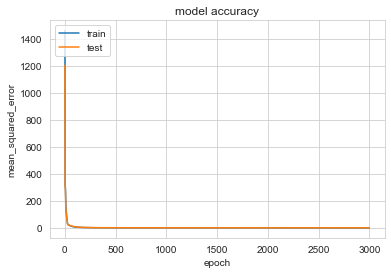

In [324]:
# optimum model test
from keras.callbacks import EarlyStopping


reX = scaler.transform(X_train)

model = Sequential()
model.add(Dense(42, input_dim=reX.shape[1], kernel_initializer='normal', activation='leaky_relu'))
model.add(Dense(42, kernel_initializer='normal', activation='leaky_relu'))
model.add(Dense(32, kernel_initializer='normal', activation='leaky_relu'))
model.add(Dense(3, kernel_initializer='normal', activation='leaky_relu'))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=1000)

history = model.fit(reX, y_train, validation_split=0.2, epochs=3000, callbacks=[es])
#history = model.fit(reX, y, validation_split=0.2, epochs=15000)

#print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('model accuracy')
plt.ylabel('mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

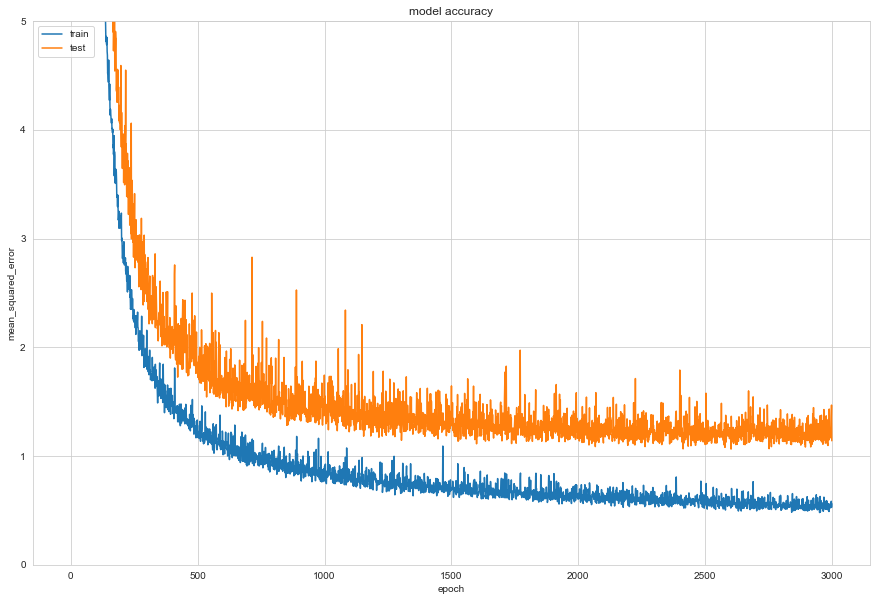

In [325]:
plt.figure(figsize=(15,10))
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('model accuracy')
plt.ylabel('mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
#plt.xlim([2000, 4300])
plt.ylim([0, 5])
plt.show()

In [326]:
Title = []
MAE4 = []
MSE4 = []
R24 = []

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
#scaler = StandardScaler().fit(X_train)

rescaledTestX = scaler.transform(X_test)
predictions = model.predict(rescaledTestX)


name = 'Neural_Network'
Title.append('%s' % name)
MAE4.append('%f' %  round(sm.mean_absolute_error(y_test, predictions),5))
MSE4.append('%f' %  round(sm.mean_squared_error(y_test, predictions),5))
R24.append('%f' %  round(sm.r2_score(y_test,predictions),5))

In [327]:
y_test = y_test.reset_index(drop='index')
#y_test = y_test.drop(['index'],axis=1)
y_test

,Target_L,Target_a,Target_b
0,61.68,-3.26,-2.37
1,36.11,1.88,-36.61
2,51.51,-3.38,-21.85
3,40.79,-0.54,-0.66
4,63.75,29.82,5.34
...,...,...,...
733,38.36,-15.43,14.74
734,41.38,-5.61,4.18
735,43.25,-6.64,-32.66
736,74.66,9.66,38.97


In [328]:
predictions = pd.DataFrame(predictions, columns = ['Pred_L','Pred_a','Pred_b'])
predictions

,Pred_L,Pred_a,Pred_b
0,60.867821,-3.794278,-3.128529
1,36.382347,1.504074,-37.105362
2,50.966061,-2.251153,-22.566294
3,40.453205,-0.129636,-0.770201
4,65.551941,30.865332,5.236218
...,...,...,...
733,37.566467,-14.410138,14.864221
734,41.853355,-5.543314,4.495006
735,43.047943,-5.021450,-33.783901
736,74.710571,11.525831,40.283115


In [329]:
F2_result = pd.DataFrame(Title)
F2_result.columns = ['Model']
F2_result['MAE'] = pd.DataFrame(MAE4)
F2_result['MSE'] = pd.DataFrame(MSE4)
F2_result['R2'] = pd.DataFrame(R24)
#F_result['Std'] = pd.DataFrame(round(sm.r2_score(y_test,predictions),5))

F2_result

,Model,MAE,MSE,R2
0,Neural_Network,0.725600,1.066170,0.997150


In [330]:
new_result = pd.concat((y_test, predictions),axis=1)
new_result['Delta_E'] = ((y_test['Target_L'] - predictions['Pred_L'])**2+(y_test['Target_a'] - predictions['Pred_a'])**2+(y_test['Target_b'] - predictions['Pred_b'])**2)**0.5 
new_result

,Target_L,Target_a,Target_b,Pred_L,Pred_a,Pred_b,Delta_E
0,61.68,-3.26,-2.37,60.867821,-3.794278,-3.128529,1.233067
1,36.11,1.88,-36.61,36.382347,1.504074,-37.105362,0.678879
2,51.51,-3.38,-21.85,50.966061,-2.251153,-22.566294,1.443344
3,40.79,-0.54,-0.66,40.453205,-0.129636,-0.770201,0.542193
4,63.75,29.82,5.34,65.551941,30.865332,5.236218,2.085780
...,...,...,...,...,...,...,...
733,38.36,-15.43,14.74,37.566467,-14.410138,14.864221,1.298169
734,41.38,-5.61,4.18,41.853355,-5.543314,4.495006,0.572487
735,43.25,-6.64,-32.66,43.047943,-5.021450,-33.783901,1.980829
736,74.66,9.66,38.97,74.710571,11.525831,40.283115,2.282138


In [331]:
test = new_result['Delta_E'].mean()
test

1.454073909198986

In [332]:
new_result[new_result['Delta_E']<1.5].count()

Target_L    473
Target_a    473
Target_b    473
Pred_L      473
Pred_a      473
Pred_b      473
Delta_E     473
dtype: int64

In [333]:
acc = new_result[new_result['Delta_E']<1.5].count() / new_result.shape[0]
acc

Target_L    0.640921
Target_a    0.640921
Target_b    0.640921
Pred_L      0.640921
Pred_a      0.640921
Pred_b      0.640921
Delta_E     0.640921
dtype: float64

In [334]:
model.save("model_add.h5")

In [335]:
model = load_model('model_add.h5')


In [336]:
rescaledTrainX = scaler.transform(X_train)
predictions2 = model.predict(rescaledTrainX )

predictions2 = pd.DataFrame(predictions2, columns = ['Pred_L','Pred_a','Pred_b'])
predictions

,Pred_L,Pred_a,Pred_b
0,60.867821,-3.794278,-3.128529
1,36.382347,1.504074,-37.105362
2,50.966061,-2.251153,-22.566294
3,40.453205,-0.129636,-0.770201
4,65.551941,30.865332,5.236218
...,...,...,...
733,37.566467,-14.410138,14.864221
734,41.853355,-5.543314,4.495006
735,43.047943,-5.021450,-33.783901
736,74.710571,11.525831,40.283115


In [337]:
y_train = y_train.reset_index(drop='index')
#y_test = y_test.drop(['index'],axis=1)
y_train

,Target_L,Target_a,Target_b
0,48.49,-24.42,-0.79
1,52.26,39.01,-8.00
2,50.21,-18.98,15.48
3,68.95,0.18,-1.77
4,75.28,27.82,1.75
...,...,...,...
2945,43.84,-38.58,-3.57
2946,34.33,12.77,-26.48
2947,41.84,-38.18,5.17
2948,65.32,24.59,11.94


In [338]:
new_result2 = pd.concat((y_train, predictions2),axis=1)
new_result2['Delta_E'] = ((y_train['Target_L'] - predictions2['Pred_L'])**2+(y_train['Target_a'] - predictions2['Pred_a'])**2+(y_train['Target_b'] - predictions2['Pred_b'])**2)**0.5 
new_result2

,Target_L,Target_a,Target_b,Pred_L,Pred_a,Pred_b,Delta_E
0,48.49,-24.42,-0.79,48.426804,-23.102531,-1.582701,1.538861
1,52.26,39.01,-8.00,52.899010,38.225361,-7.871949,1.019995
2,50.21,-18.98,15.48,49.551598,-19.994646,16.300930,1.461823
3,68.95,0.18,-1.77,68.943497,0.022628,-2.289560,0.542910
4,75.28,27.82,1.75,74.921066,28.598087,2.249476,0.991831
...,...,...,...,...,...,...,...
2945,43.84,-38.58,-3.57,42.666321,-35.613934,-3.088005,3.226049
2946,34.33,12.77,-26.48,33.723274,12.828453,-25.470184,1.179517
2947,41.84,-38.18,5.17,42.355354,-38.761715,6.043245,1.168991
2948,65.32,24.59,11.94,66.073166,26.566570,12.435793,2.172533


In [339]:
test2 = new_result2['Delta_E'].mean()
test2

1.0580121400421632

In [340]:
new_result2[new_result2['Delta_E']<1.5].count()

Target_L    2476
Target_a    2476
Target_b    2476
Pred_L      2476
Pred_a      2476
Pred_b      2476
Delta_E     2476
dtype: int64

In [341]:
new_result2.shape

(2950, 7)